# Estandarizar los datos

- Min Max
- Normalizar (Z-score)

## Load data

In [1]:
import time
start_i = time.time()

In [2]:
import pandas as pd
import warnings
# pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 200
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data = pd.read_csv("../_datasets/creditcard.csv.gz", sep=",")
print("data.shape=",data.shape)
data.head()

data.shape= (284807, 31)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [4]:
target = "Class"

In [5]:
data.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  8.190001e-16      0.995274   -5.791881     -0.648539   
V14     284807.0  1.207294e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  4.887456e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.437716e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -3.772171e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  9.564149e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  1.039917e-15      0.814041   -7.213527     -0.456299   
V20     284807.0  6.406204e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.654067e-16      0.734524  -34.830382     -0.228395   
V22     284807.0 -3.568593e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  2.578648e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.473266e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  5.340915e-16      0.521278  -10.295397     -0.317145   
V26     284807.0  1.683437e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660091e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.227390e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

## MinMax Scaler

In [6]:
from sklearn.preprocessing import Normalizer, MinMaxScaler

In [9]:
dataS = MinMaxScaler((0,1)).fit_transform(data.drop('Class',axis=1))
dataS = pd.concat([pd.DataFrame(dataS, columns=data.columns[:-1]), data['Class']], axis=1)
dataS.head()

dataN.shape= (284807, 31)


Time        V1        V2        V3        V4        V5        V6  \
0  0.000000  0.935192  0.766490  0.881365  0.313023  0.763439  0.267669   
1  0.000000  0.978542  0.770067  0.840298  0.271796  0.766120  0.262192   
2  0.000006  0.935217  0.753118  0.868141  0.268766  0.762329  0.281122   
3  0.000006  0.941878  0.765304  0.868484  0.213661  0.765647  0.275559   
4  0.000012  0.938617  0.776520  0.864251  0.269796  0.762975  0.263984   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.266815  0.786444  0.475312  0.510600  0.252484  0.680908  0.371591   
1  0.264875  0.786298  0.453981  0.505267  0.381188  0.744342  0.486190   
2  0.270177  0.788042  0.410603  0.513018  0.322422  0.706683  0.503854   
3  0.266803  0.789434  0.414999  0.507585  0.271817  0.710910  0.487635   
4  0.268968  0.782484  0.490950  0.524303  0.236355  0.724477  0.552509   

        V14       V15       V16       V17       V18       V19       V20  \
0  0.635591  0.446084  0.434392  0.737173  0.655066  0.594863  0.582942   
1  0.641219  0.383840  0.464105  0.727794  0.640681  0.551930  0.579530   
2  0.640473  0.511697  0.357443  0.763381  0.644945  0.386683  0.585855   
3  0.636372  0.289124  0.415653  0.711253  0.788492  0.467058  0.578050   
4  0.608406  0.349419  0.434995  0.724243  0.650665  0.626060  0.584615   

        V21       V22       V23       V24       V25       V26       V27  \
0  0.561184  0.522992  0.663793  0.391253  0.585122  0.394557  0.418976   
1  0.557840  0.480237  0.666938  0.336440  0.587290  0.446013  0.416345   
2  0.565477  0.546030  0.678939  0.289354  0.559515  0.402727  0.415489   
3  0.559734  0.510277  0.662607  0.223826  0.614245  0.389197  0.417669   
4  0.561327  0.547271  0.663392  0.401270  0.566343  0.507497  0.420561   

        V28    Amount  Class  
0  0.312697  0.005824      0  
1  0.313423  0.000105      0  
2  0.311911  0.014739      0  
3  0.314371  0.004807      0  
4  0.317490  0.002724      0

In [10]:
dataS.describe().T

count      mean       std  min       25%       50%       75%  max
Time    284807.0  0.548717  0.274828  0.0  0.313681  0.490138  0.806290  1.0
V1      284807.0  0.958294  0.033276  0.0  0.942658  0.958601  0.980645  1.0
V2      284807.0  0.767258  0.017424  0.0  0.760943  0.767949  0.775739  1.0
V3      284807.0  0.837414  0.026275  0.0  0.821985  0.840530  0.855213  1.0
V4      284807.0  0.251930  0.062764  0.0  0.214311  0.251050  0.284882  1.0
V5      284807.0  0.765716  0.009292  0.0  0.761060  0.765351  0.769836  1.0
V6      284807.0  0.263020  0.013395  0.0  0.255295  0.260263  0.267027  1.0
V7      284807.0  0.265356  0.007537  0.0  0.261980  0.265600  0.268831  1.0
V8      284807.0  0.785385  0.012812  0.0  0.783148  0.785625  0.788897  1.0
V9      284807.0  0.462780  0.037846  0.0  0.440626  0.461008  0.483350  1.0
V10     284807.0  0.508722  0.022528  0.0  0.497644  0.506800  0.518113  1.0
V11     284807.0  0.285286  0.060698  0.0  0.239943  0.283338  0.329266  1.0
V12     284807.0  0.704193  0.037660  0.0  0.688907  0.709471  0.727494  1.0
V13     284807.0  0.448331  0.077041  0.0  0.398130  0.447281  0.499613  1.0
V14     284807.0  0.646053  0.032231  0.0  0.631744  0.647755  0.662635  1.0
V15     284807.0  0.336327  0.068426  0.0  0.292753  0.339921  0.384831  1.0
V16     284807.0  0.449352  0.027866  0.0  0.434468  0.451464  0.465994  1.0
V17     284807.0  0.731130  0.024678  0.0  0.717074  0.729221  0.742743  1.0
V18     284807.0  0.653292  0.057647  0.0  0.618983  0.653042  0.687736  1.0
V19     284807.0  0.563315  0.063570  0.0  0.527682  0.563606  0.599155  1.0
V20     284807.0  0.580265  0.008208  0.0  0.578011  0.579600  0.581682  1.0
V21     284807.0  0.561480  0.011841  0.0  0.557798  0.561005  0.564484  1.0
V22     284807.0  0.510031  0.033854  0.0  0.484730  0.510347  0.534688  1.0
V23     284807.0  0.665434  0.009274  0.0  0.663030  0.665267  0.667626  1.0
V24     284807.0  0.382234  0.081611  0.0  0.334454  0.387756  0.441460  1.0
V25     284807.0  0.577907  0.029261  0.0  0.560104  0.578838  0.597593  1.0
V26     284807.0  0.425448  0.078771  0.0  0.372036  0.416932  0.464807  1.0
V27     284807.0  0.416511  0.007450  0.0  0.415203  0.416536  0.418191  1.0
V28     284807.0  0.313124  0.006698  0.0  0.312049  0.313352  0.314712  1.0
Amount  284807.0  0.003439  0.009736  0.0  0.000218  0.000856  0.003004  1.0
Class   284807.0  0.001727  0.041527  0.0  0.000000  0.000000  0.000000  1.0

## Normalizer

In [11]:
dataN = Normalizer().fit_transform(data.drop('Class',axis=1))
dataN = pd.concat([pd.DataFrame(dataN, columns=data.columns[:-1]), data['Class']], axis=1)
print("dataN.shape=",dataN.shape)
dataN.head()

dataN.shape= (284807, 31)


Time        V1        V2        V3        V4        V5        V6  \
0  0.000000 -0.009085 -0.000486  0.016946  0.009208 -0.002260  0.003089   
1  0.000000  0.314200  0.070163  0.043888  0.118143  0.015822 -0.021712   
2  0.002641 -0.003587 -0.003539  0.004682  0.001003 -0.001329  0.004754   
3  0.008092 -0.007819 -0.001499  0.014509 -0.006986 -0.000083  0.010092   
4  0.028527 -0.016520  0.012520  0.022090  0.005749 -0.005808  0.001368   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.001601  0.000659  0.002431  0.000607 -0.003685 -0.004128 -0.006624   
1 -0.020774  0.022435 -0.067336 -0.044018  0.425151  0.280820  0.128936   
2  0.002090  0.000654 -0.004000  0.000548  0.001649  0.000174  0.001894   
3  0.001923  0.003054 -0.011224 -0.000445 -0.001833  0.001442  0.004109   
4  0.008457 -0.003859  0.011664  0.010741 -0.011737  0.007677  0.019196   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.002079  0.009809 -0.003143  0.001390  0.000172  0.002699  0.001680   
1 -0.037902  0.167547  0.122299 -0.030265 -0.048338 -0.038432 -0.018212   
2 -0.000438  0.006194 -0.007631  0.002931 -0.000320 -0.005973  0.001386   
3 -0.002330 -0.005109 -0.008575 -0.005536  0.015907 -0.009974 -0.001683   
4 -0.015970  0.002498 -0.006439 -0.003381 -0.000545  0.011460  0.005827   

        V21       V22       V23       V24       V25       V26       V27  \
0 -0.000122  0.001856 -0.000738  0.000447  0.000859 -0.001264  0.000892   
1 -0.059519 -0.168368  0.026702 -0.089591  0.044070  0.033189 -0.002368   
2  0.000655  0.002038  0.002401 -0.001820 -0.000865 -0.000367 -0.000146   
3 -0.000876  0.000043 -0.001540 -0.009513  0.005239 -0.001796  0.000508   
4 -0.000135  0.011386 -0.001961  0.002015 -0.002938  0.007164  0.003130   

        V28    Amount  Class  
0 -0.000141  0.999658      0  
1  0.003882  0.709144      0  
2 -0.000158  0.999868      0  
3  0.000497  0.999366      0  
4  0.003069  0.998299      0

In [13]:
dataN.describe().T

count          mean       std       min           25%  \
Time    284807.0  9.996874e-01  0.011863  0.000000  9.999994e-01   
V1      284807.0 -4.319837e-06  0.000979 -0.108392 -1.179288e-05   
V2      284807.0  9.726699e-06  0.000688 -0.109373 -6.773752e-06   
V3      284807.0  2.878808e-05  0.000818 -0.058163 -7.574048e-06   
V4      284807.0  8.159192e-06  0.000811 -0.101801 -9.034555e-06   
V5      284807.0  2.085969e-07  0.000753 -0.145885 -9.076457e-06   
V6      284807.0  5.079369e-06  0.000726 -0.046558 -8.442477e-06   
V7      284807.0  1.049236e-06  0.000462 -0.105321 -6.649321e-06   
V8      284807.0 -7.290095e-08  0.000385 -0.090978 -2.229018e-06   
V9      284807.0  2.087040e-06  0.000595 -0.127312 -7.818226e-06   
V10     284807.0  1.561276e-07  0.000551 -0.075828 -6.286710e-06   
V11     284807.0  1.031207e-05  0.001154 -0.202756 -7.779318e-06   
V12     284807.0  1.251445e-06  0.000684 -0.049687 -4.391001e-06   
V13     284807.0  1.677423e-06  0.000606 -0.113142 -7.164134e-06   
V14     284807.0 -4.218671e-08  0.000388 -0.062247 -4.884574e-06   
V15     284807.0  6.541123e-06  0.000608 -0.057921 -5.720434e-06   
V16     284807.0 -3.114614e-06  0.000545 -0.063476 -5.253212e-06   
V17     284807.0  1.717752e-07  0.000373 -0.069413 -5.110625e-06   
V18     284807.0 -5.748513e-06  0.000479 -0.087574 -5.869436e-06   
V19     284807.0 -5.507149e-07  0.000442 -0.052734 -5.458822e-06   
V20     284807.0  2.566126e-07  0.000231 -0.044086 -2.360235e-06   
V21     284807.0 -9.491936e-07  0.000278 -0.059519 -2.603115e-06   
V22     284807.0 -4.383770e-06  0.000500 -0.168368 -5.915956e-06   
V23     284807.0 -9.569317e-07  0.000177 -0.022052 -2.120289e-06   
V24     284807.0  2.682048e-07  0.000455 -0.111624 -3.689704e-06   
V25     284807.0  4.352583e-06  0.000340 -0.051046 -3.083343e-06   
V26     284807.0  3.556044e-08  0.000256 -0.036810 -4.051868e-06   
V27     284807.0  8.129126e-07  0.000189 -0.028836 -7.585090e-07   
V28     284807.0  3.230448e-08  0.000126 -0.025931 -4.217176e-07   
Amount  284807.0  2.394010e-03  0.021667  0.000000  6.314229e-05   
Class   284807.0  1.727486e-03  0.041527  0.000000  0.000000e+00   

                 50%       75%       max  
Time    1.000000e+00  1.000000  1.000000  
V1      1.425520e-07  0.000016  0.314200  
V2      7.010778e-07  0.000009  0.196105  
V3      2.090507e-06  0.000016  0.232974  
V4     -2.180936e-07  0.000010  0.172091  
V5     -5.927125e-07  0.000006  0.194558  
V6     -2.946134e-06  0.000005  0.220665  
V7      4.324084e-07  0.000006  0.097223  
V8      2.518877e-07  0.000004  0.053147  
V9     -5.392830e-07  0.000006  0.075506  
V10    -1.127298e-06  0.000005  0.120375  
V11    -3.547033e-07  0.000008  0.425151  
V12     1.420327e-06  0.000007  0.280820  
V13    -1.464875e-07  0.000007  0.128936  
V14     5.497853e-07  0.000006  0.060559  
V15     4.727793e-07  0.000008  0.167547  
V16     6.869114e-07  0.000006  0.122299  
V17    -7.344523e-07  0.000005  0.039340  
V18    -3.769312e-08  0.000005  0.063222  
V19     3.758423e-08  0.000005  0.073999  
V20    -6.784301e-07  0.000002  0.046267  
V21    -3.510701e-07  0.000002  0.056071  
V22     7.996431e-08  0.000006  0.066100  
V23    -1.271846e-07  0.000002  0.049339  
V24     4.346461e-07  0.000005  0.066306  
V25     1.930773e-07  0.000005  0.107343  
V26    -5.487545e-07  0.000003  0.052747  
V27     1.456762e-08  0.000001  0.051826  
V28     1.685082e-07  0.000001  0.019056  
Amount  2.808883e-04  0.001071  0.999868  
Class   0.000000e+00  0.000000  1.000000

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
def plot_org_norm_minmax(x_var, y_var):
    fig,ax = plt.subplots(1,3,figsize=(15,5))
    # x_var, y_var = "V20","V21"
    sns.scatterplot(data=data[data[target]==0], x=x_var, y=y_var, alpha=0.2, s=2, ax=ax[0])
    sns.scatterplot(data=data[data[target]==1], x=x_var, y=y_var, s=2, color="red", ax=ax[0])
    sns.scatterplot(data=dataN[dataN[target]==0], x=x_var, y=y_var, alpha=0.2, s=2, ax=ax[1])
    sns.scatterplot(data=dataN[dataN[target]==1], x=x_var, y=y_var, s=2, color="red", ax=ax[1])
    sns.scatterplot(data=dataS[dataS[target]==0], x=x_var, y=y_var, alpha=0.2, s=2, ax=ax[2])
    sns.scatterplot(data=dataS[dataS[target]==1], x=x_var, y=y_var, s=2, color="red", ax=ax[2])
    ax[0].set_title(f"Original ({x_var},{y_var})")
    ax[1].set_title(f"Normalized ({x_var},{y_var})")
    ax[2].set_title(f"MinMax ({x_var},{y_var})")
    plt.show()

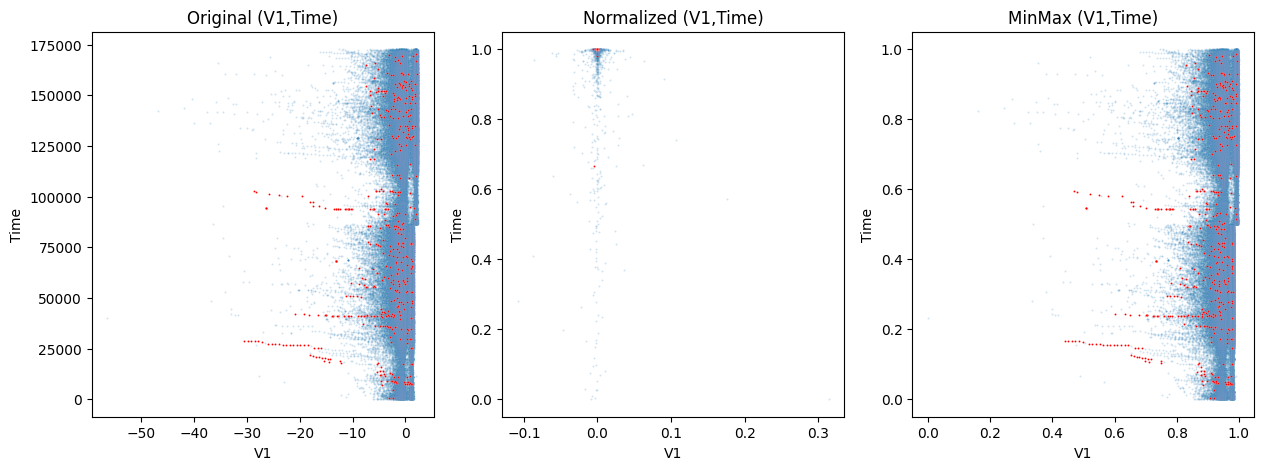

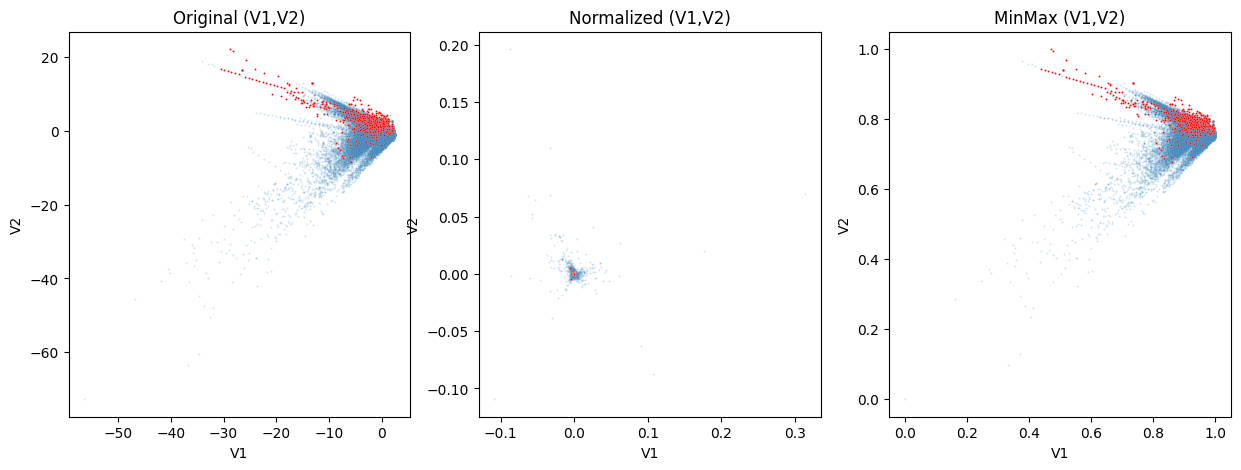

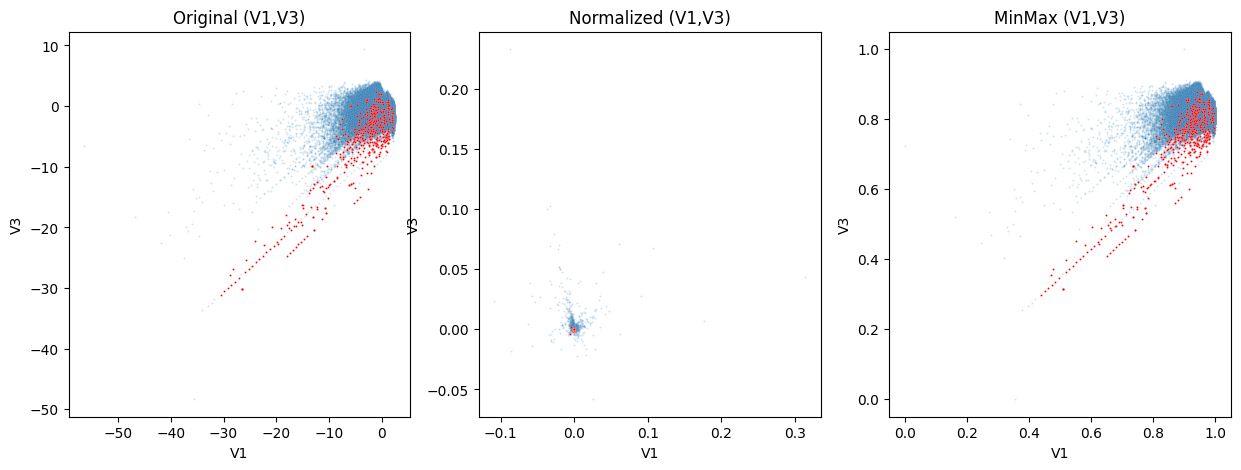

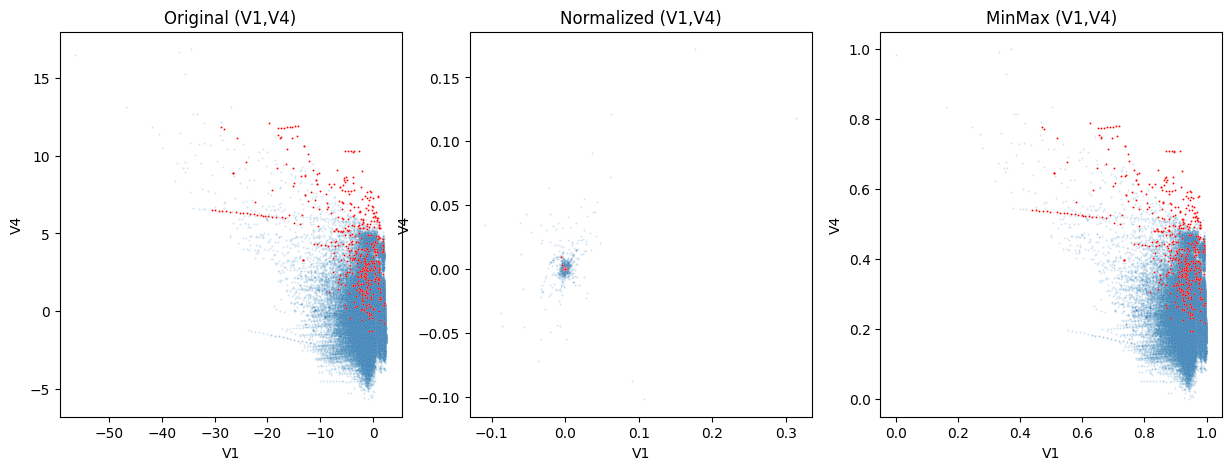

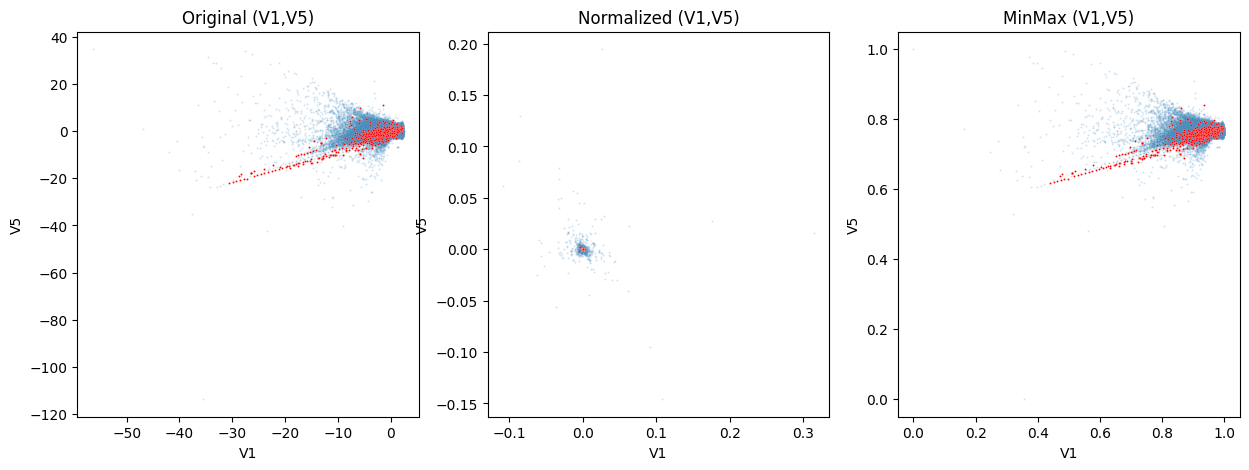

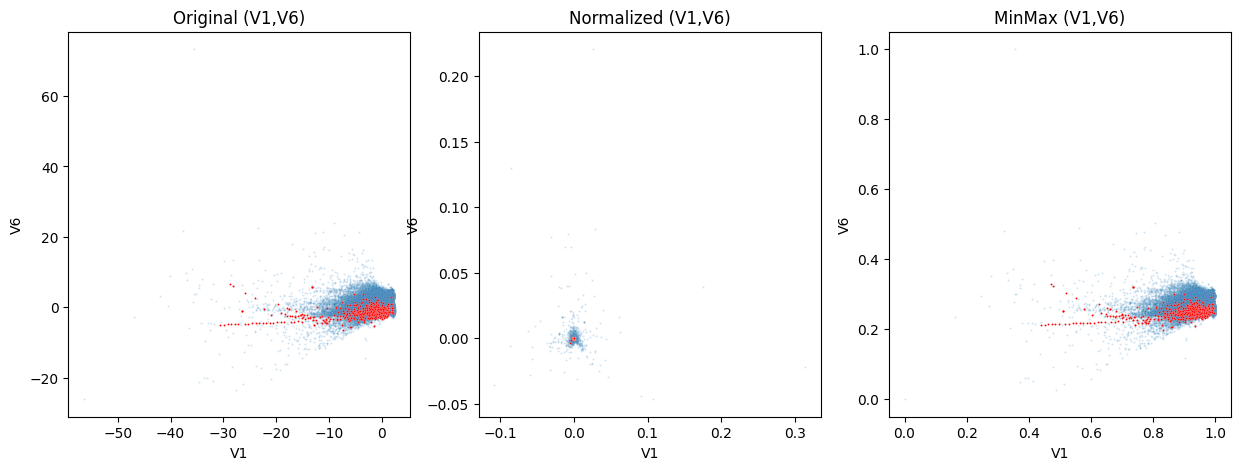

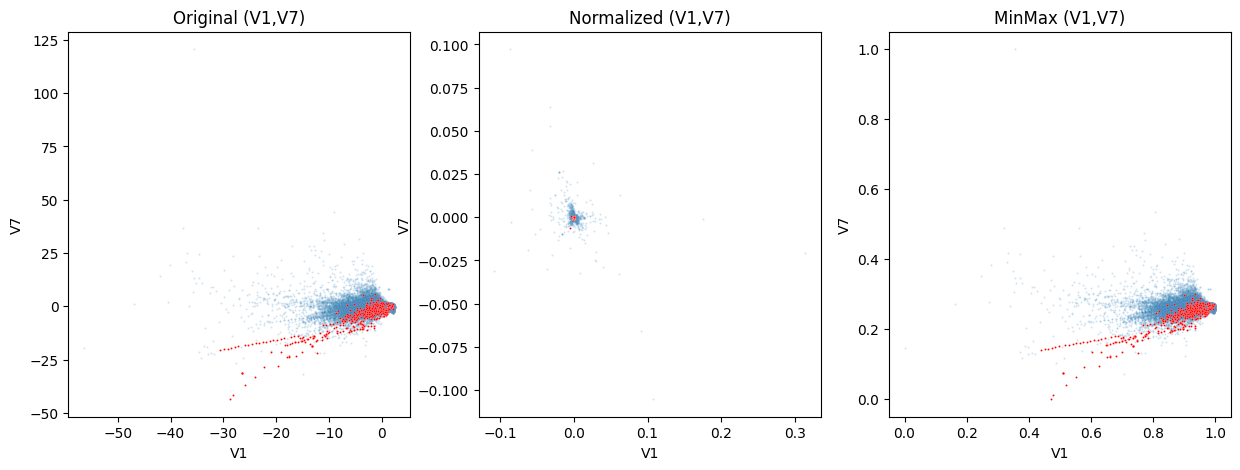

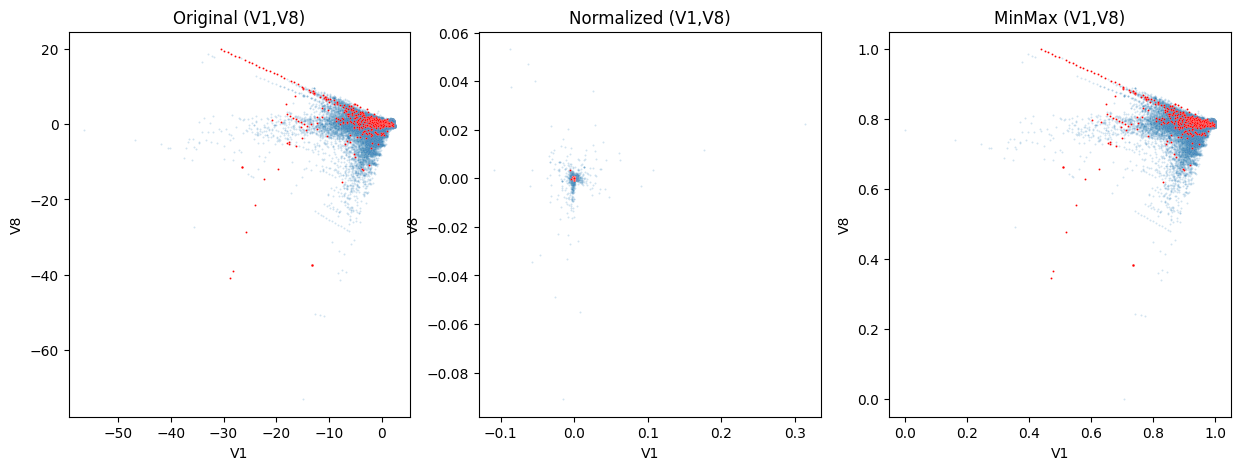

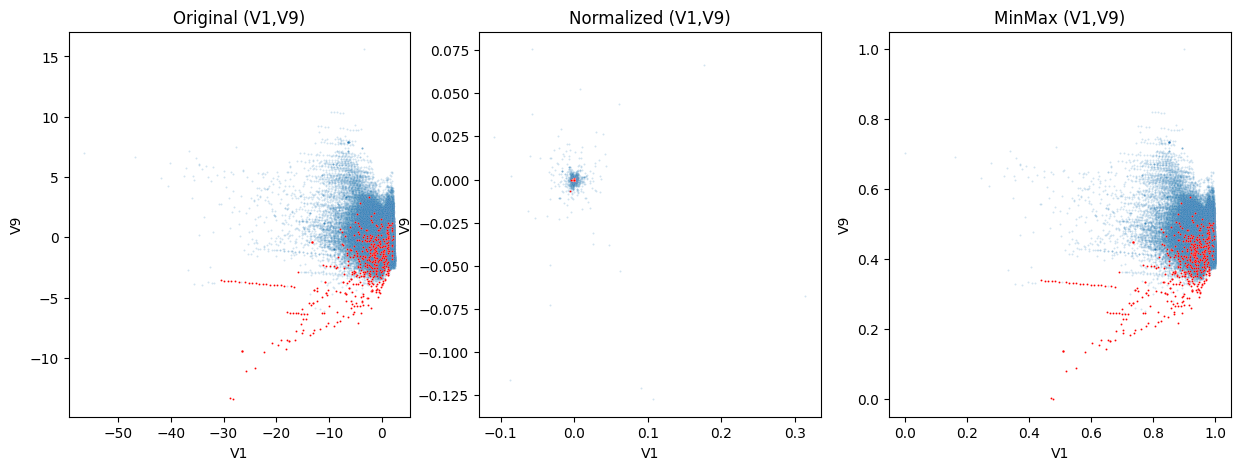

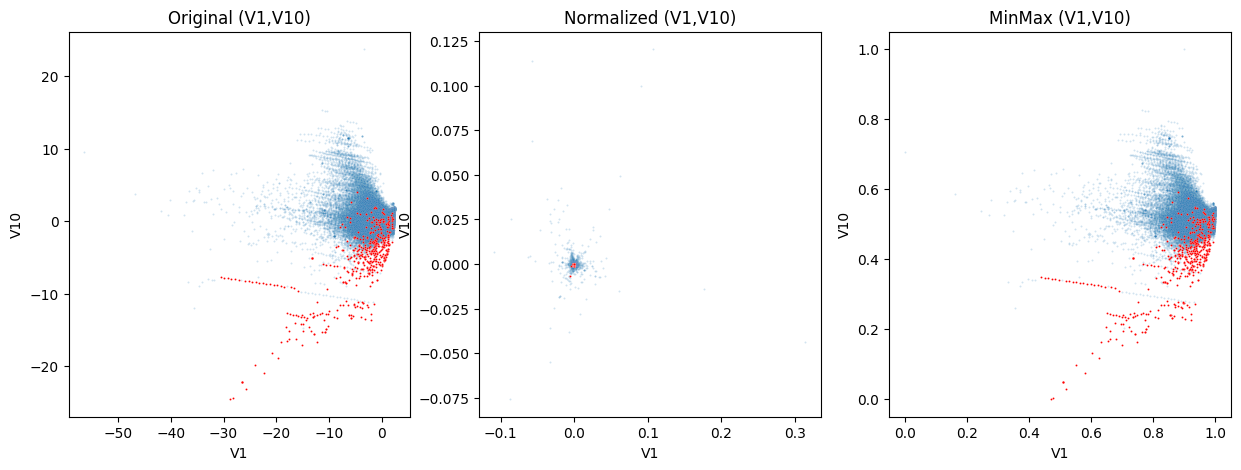

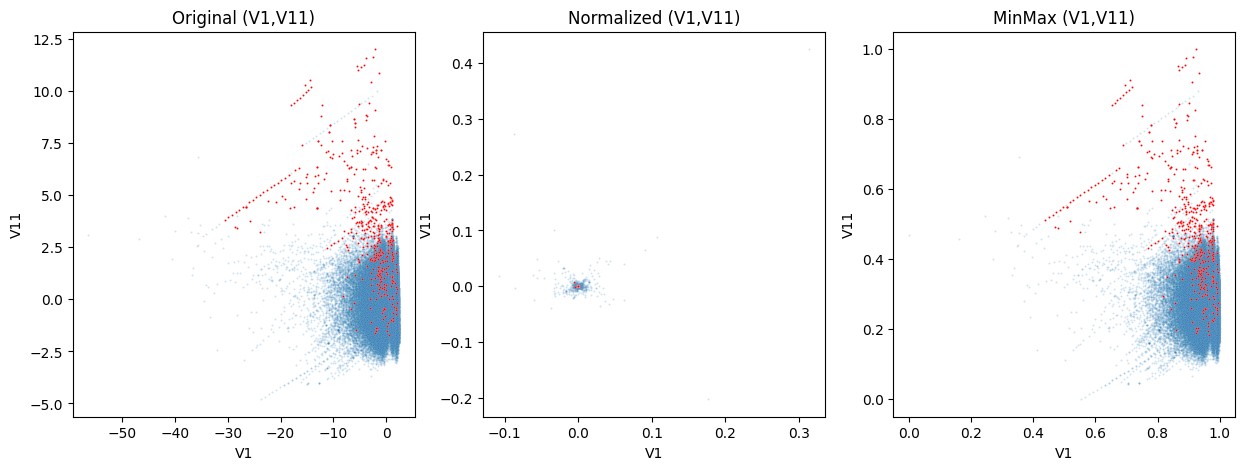

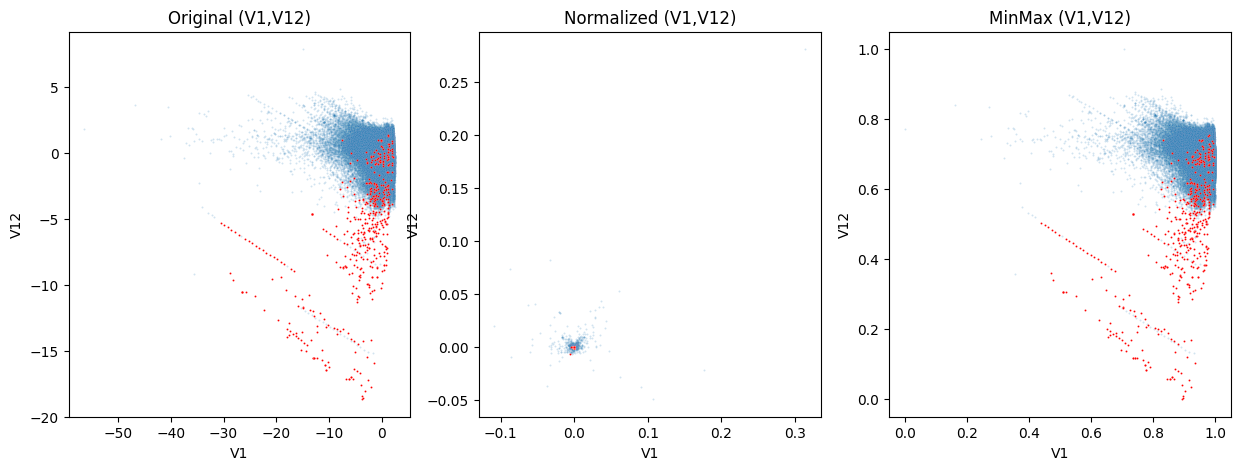

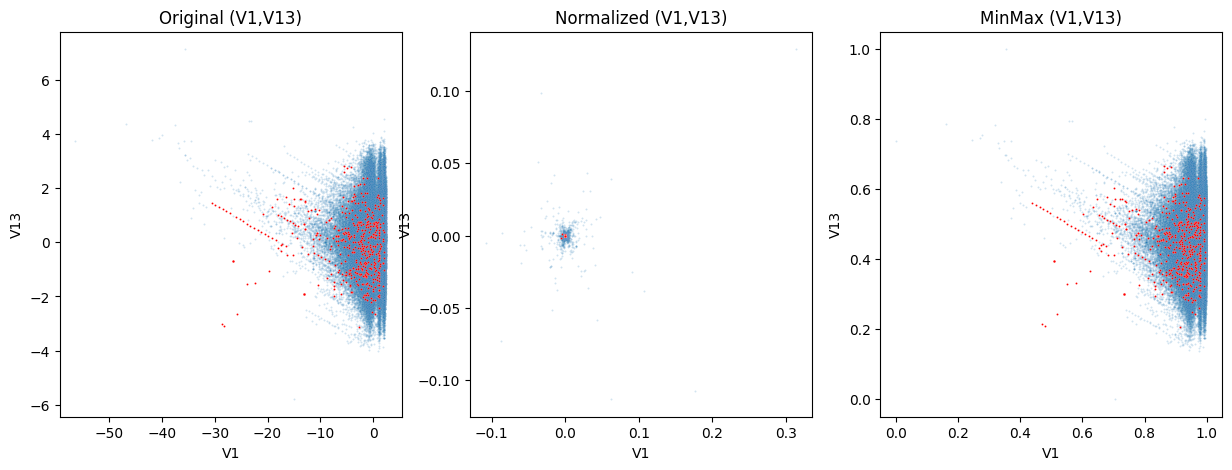

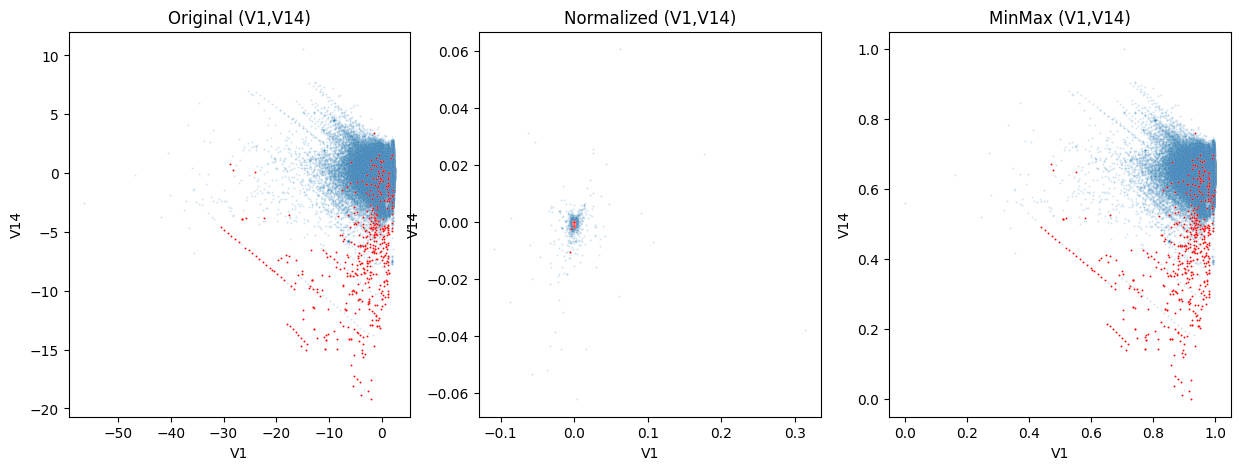

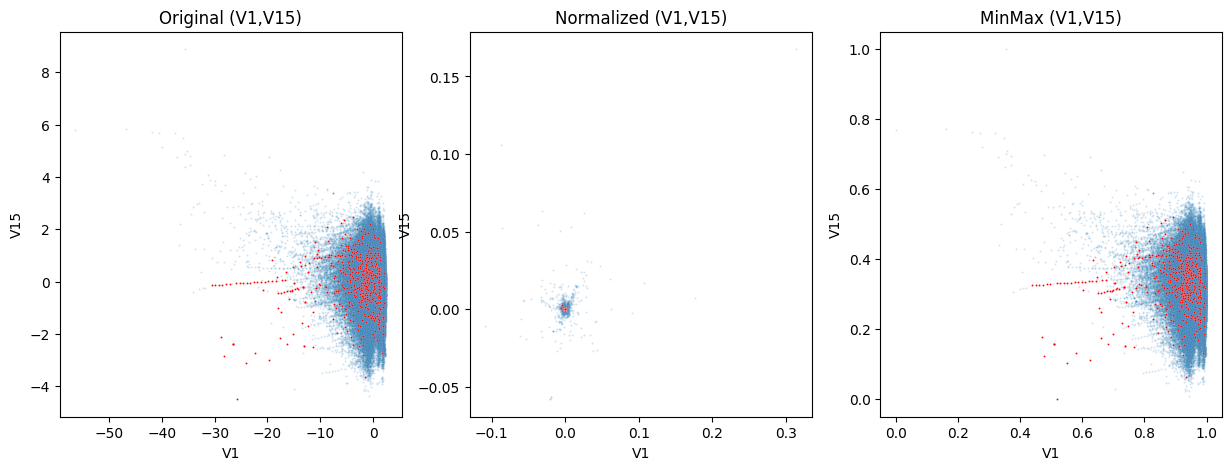

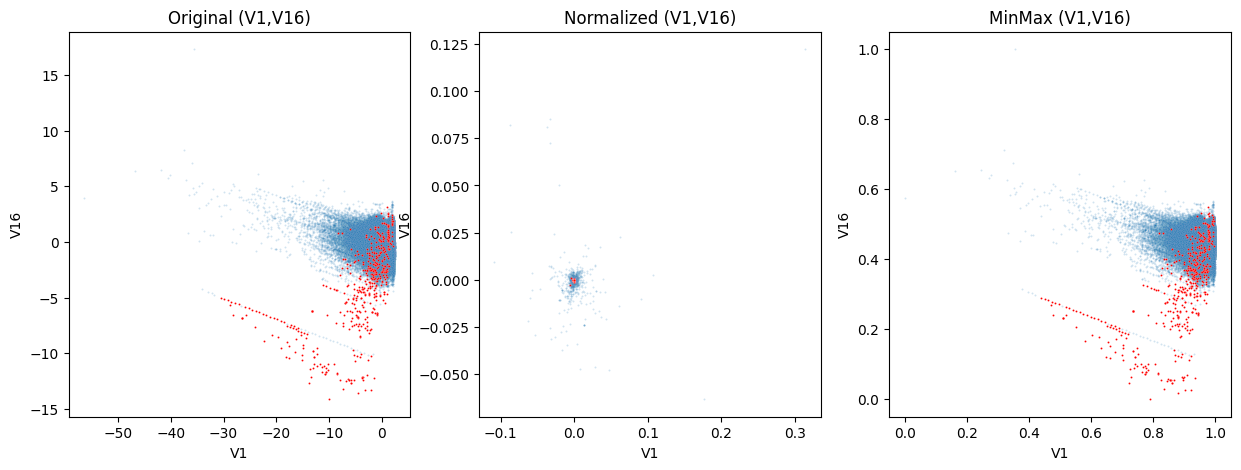

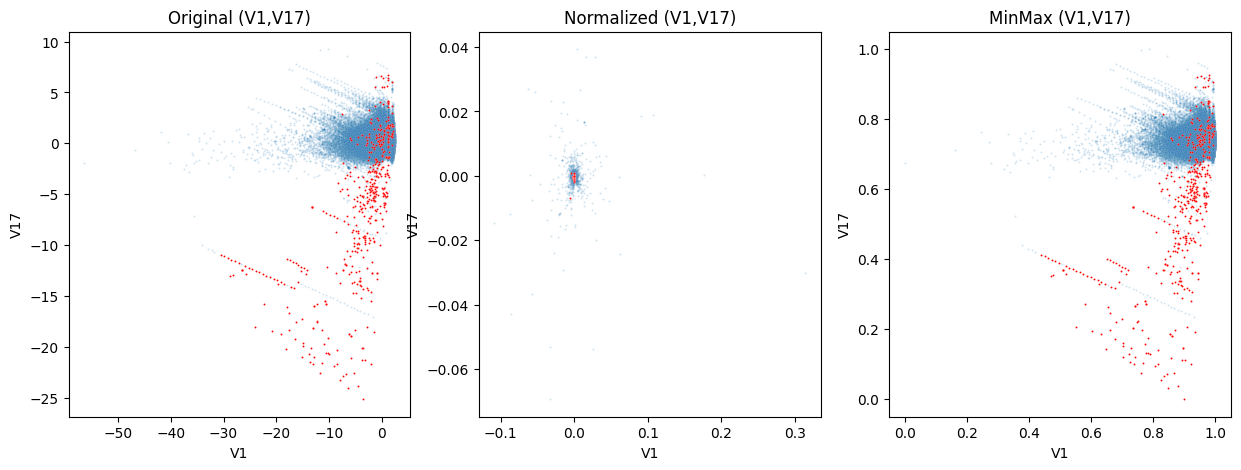

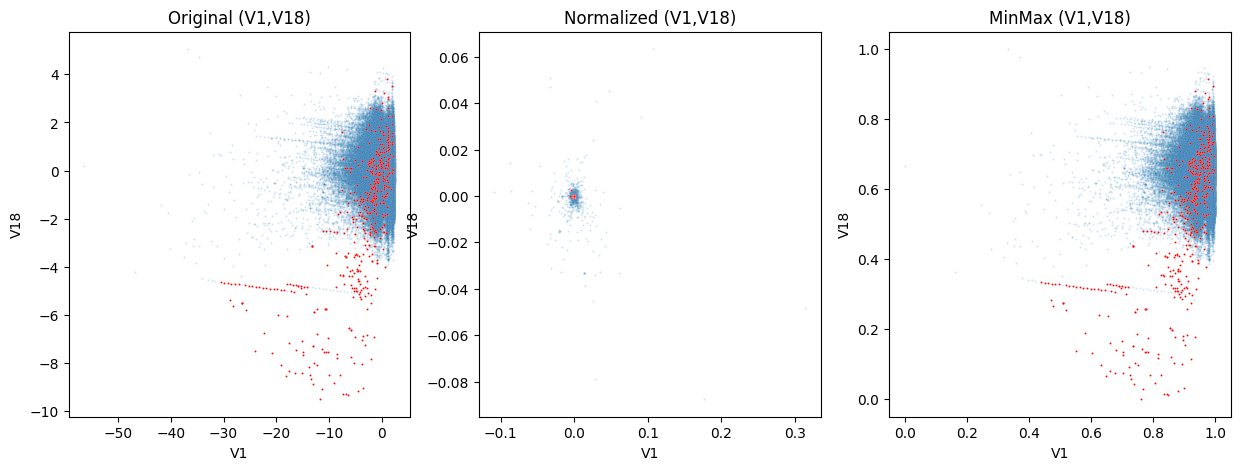

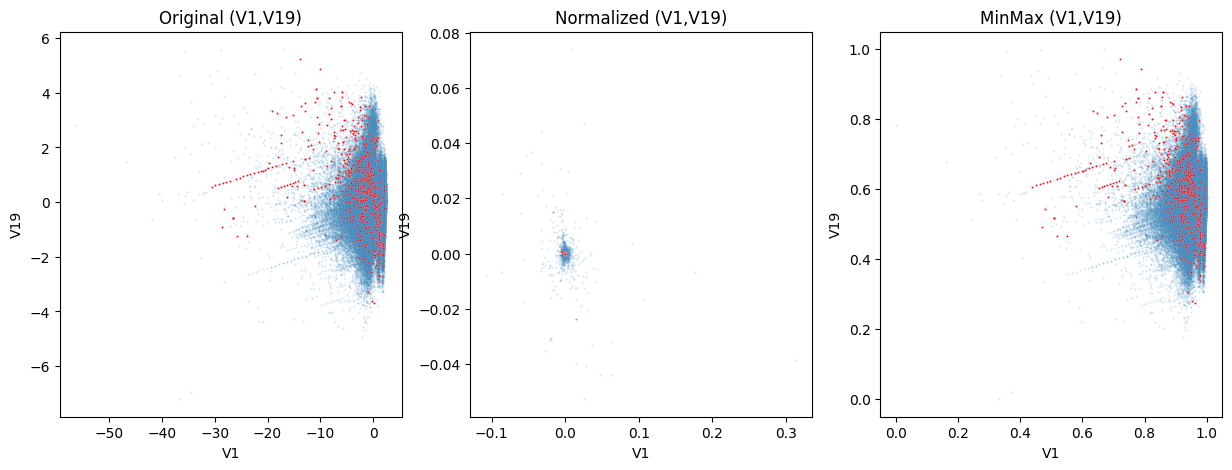

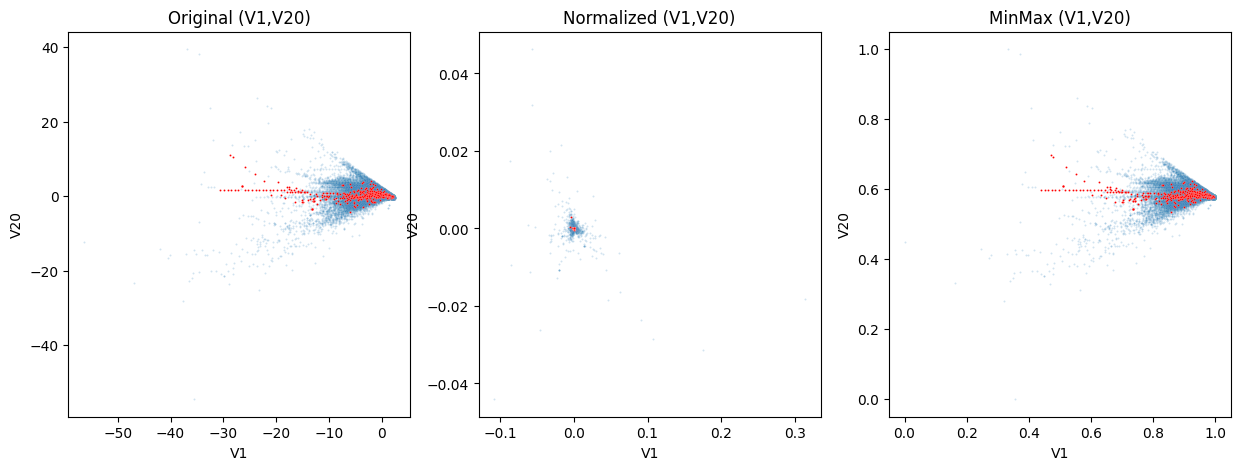

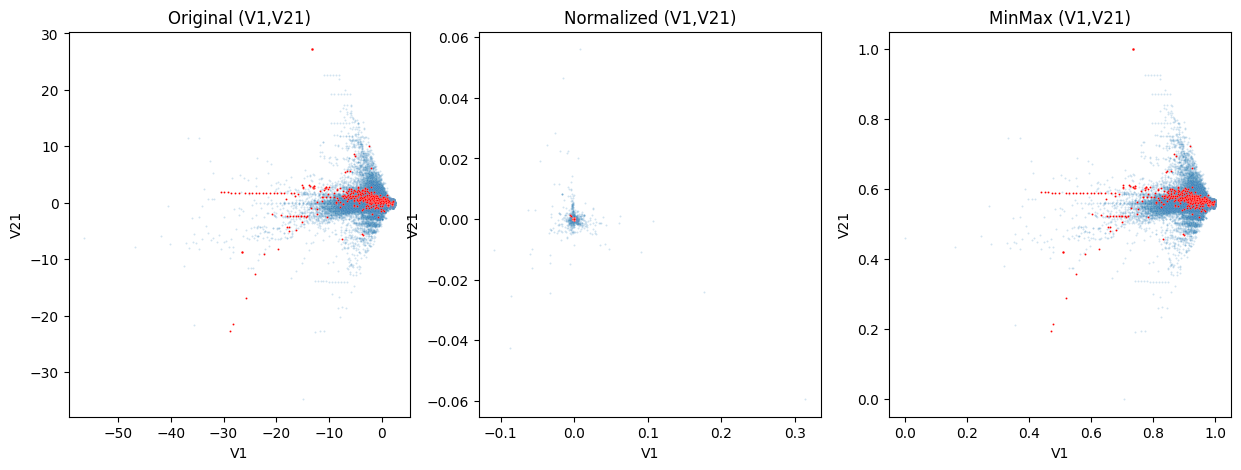

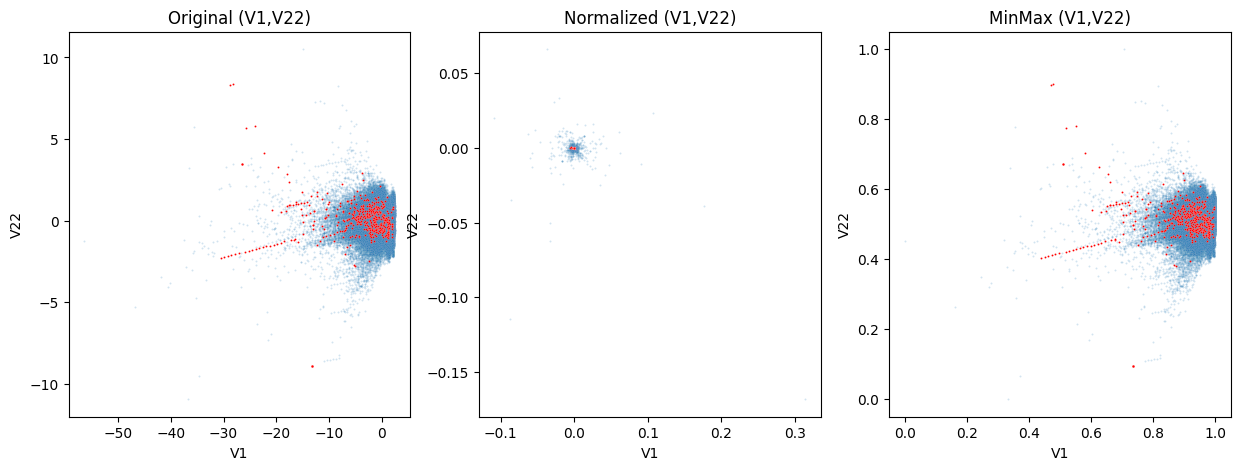

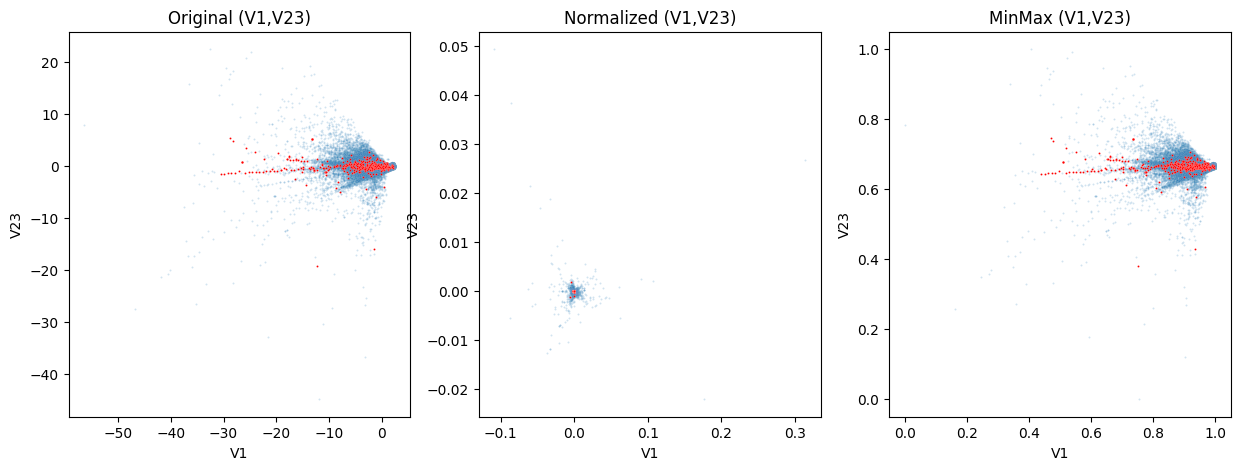

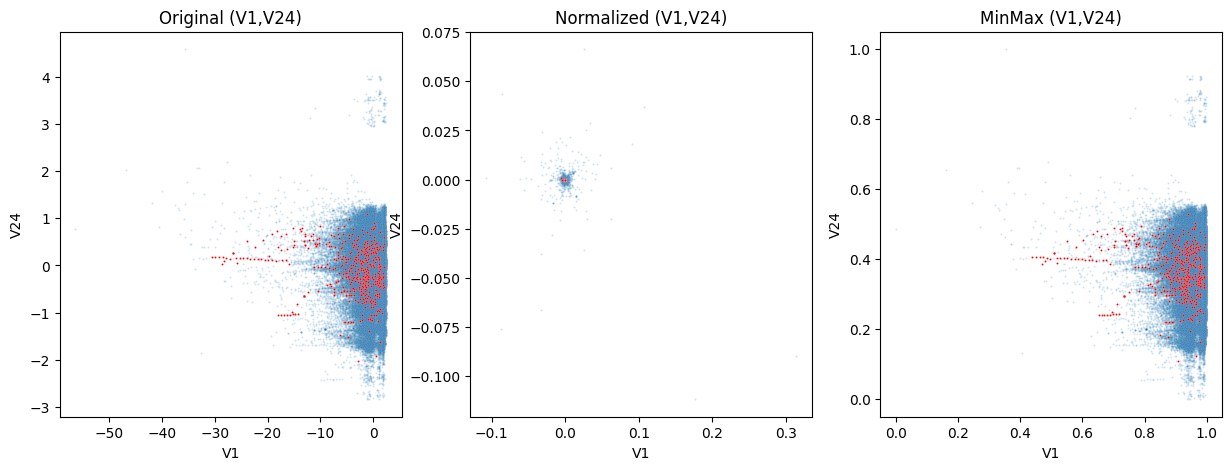

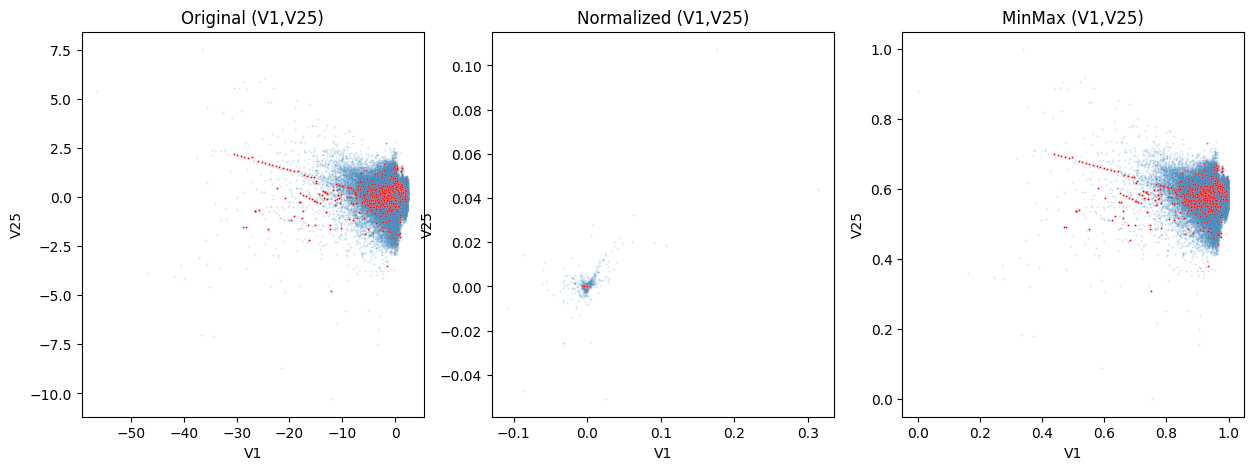

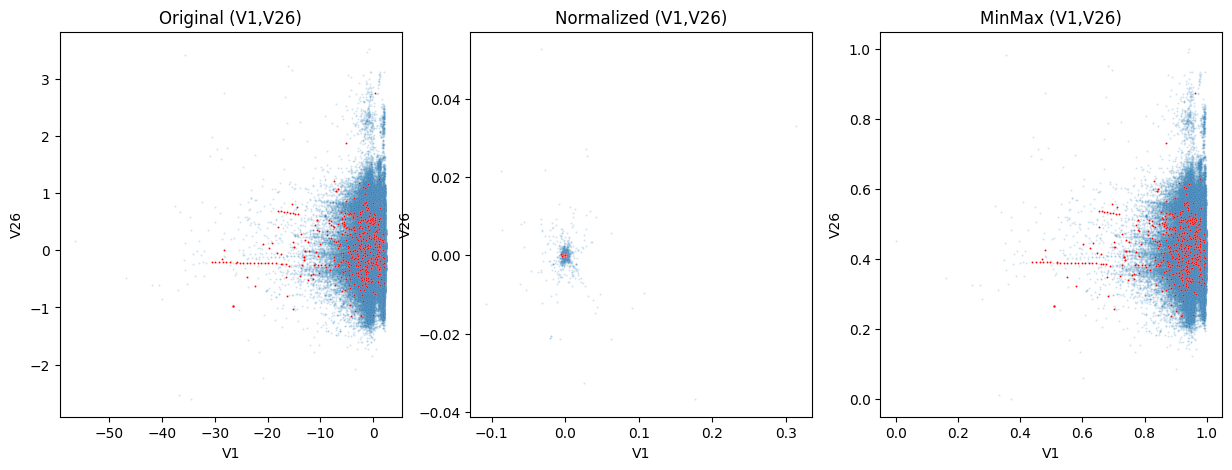

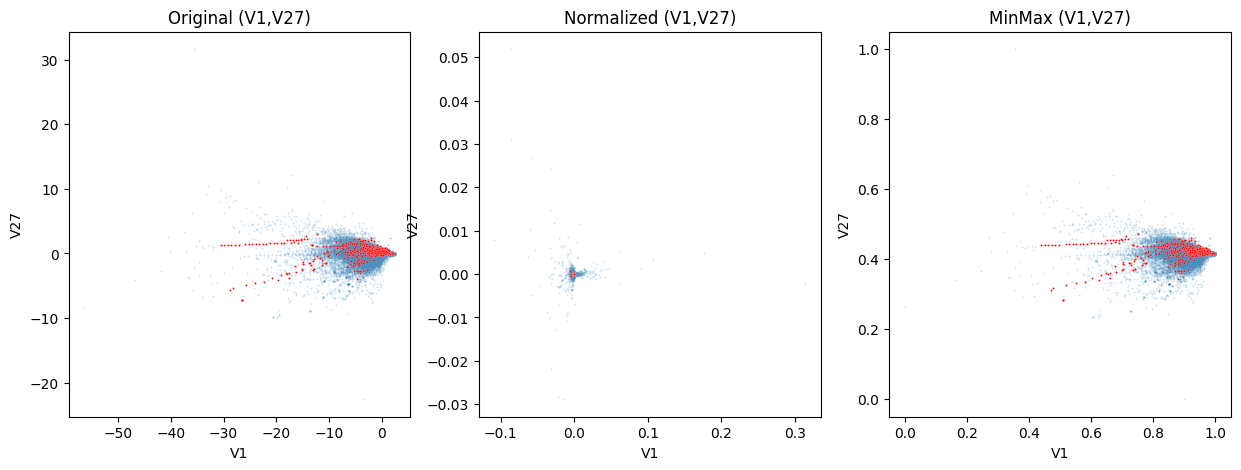

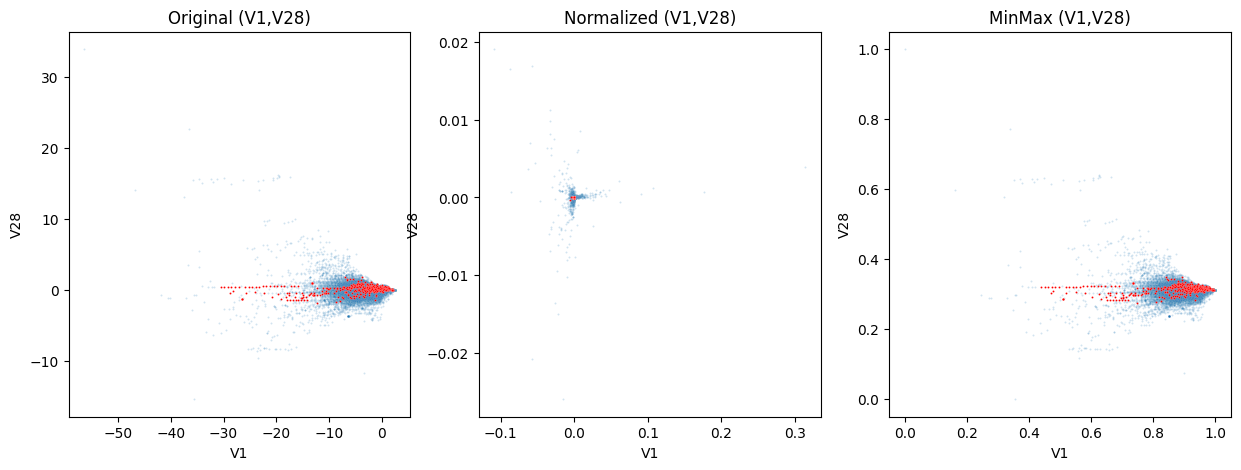

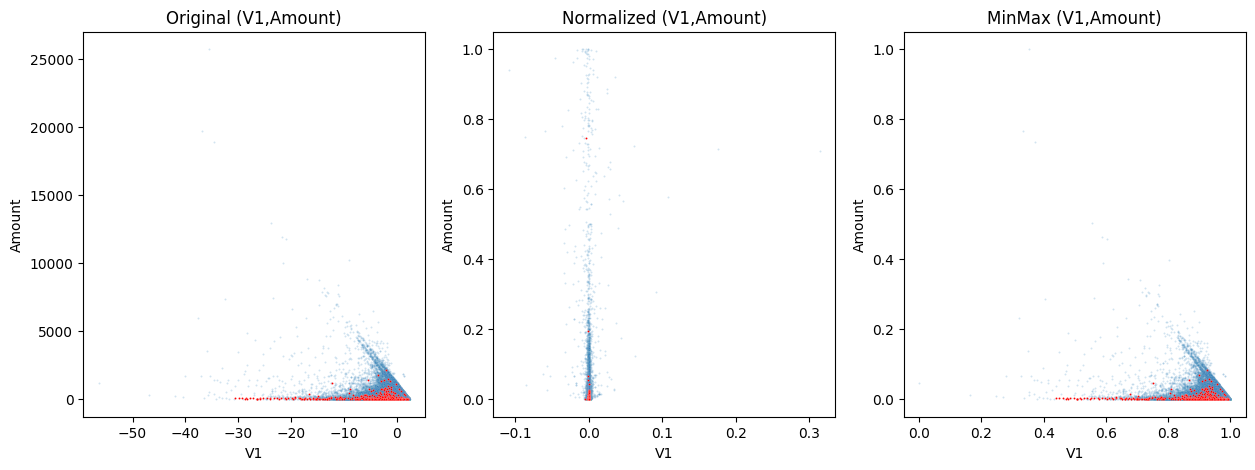

In [30]:
x_var = "V1"
for y_var in data.drop([target,x_var],axis=1).columns:
    plot_org_norm_minmax(x_var, y_var)

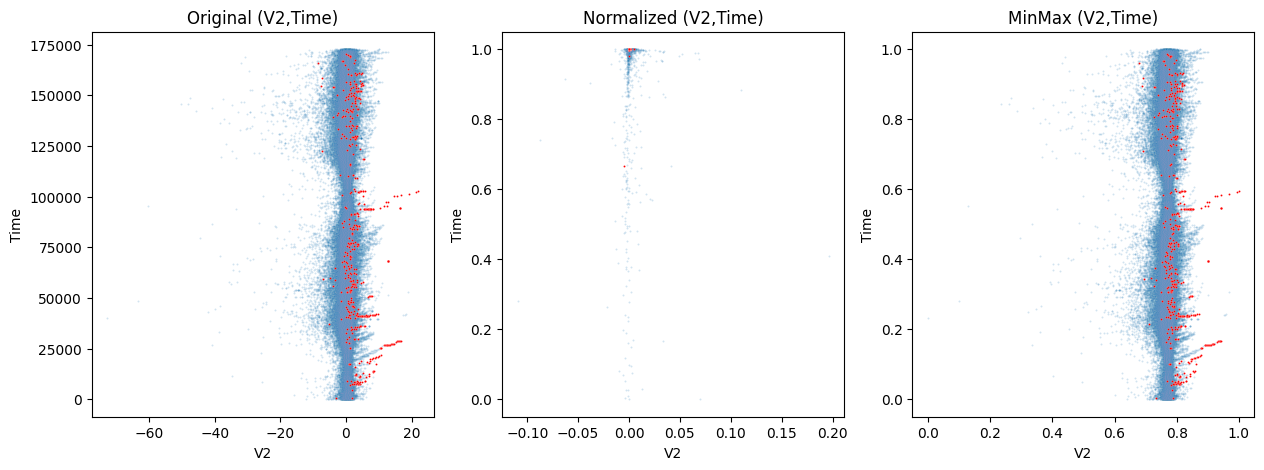

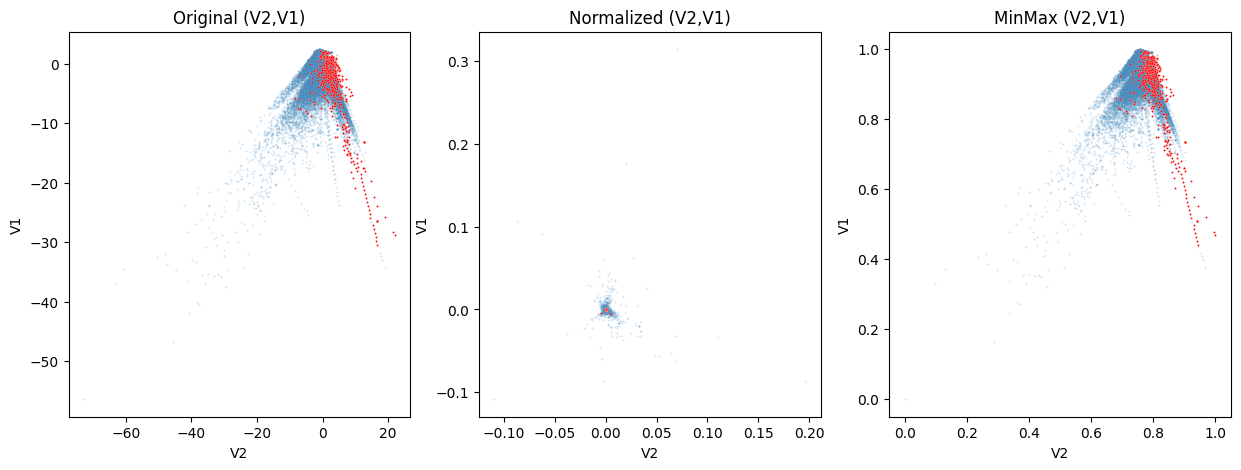

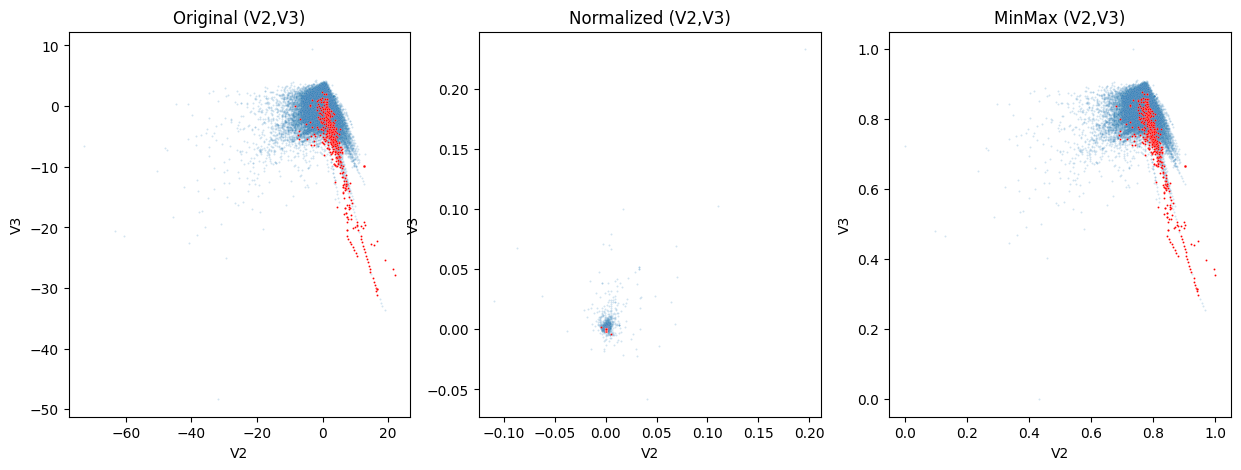

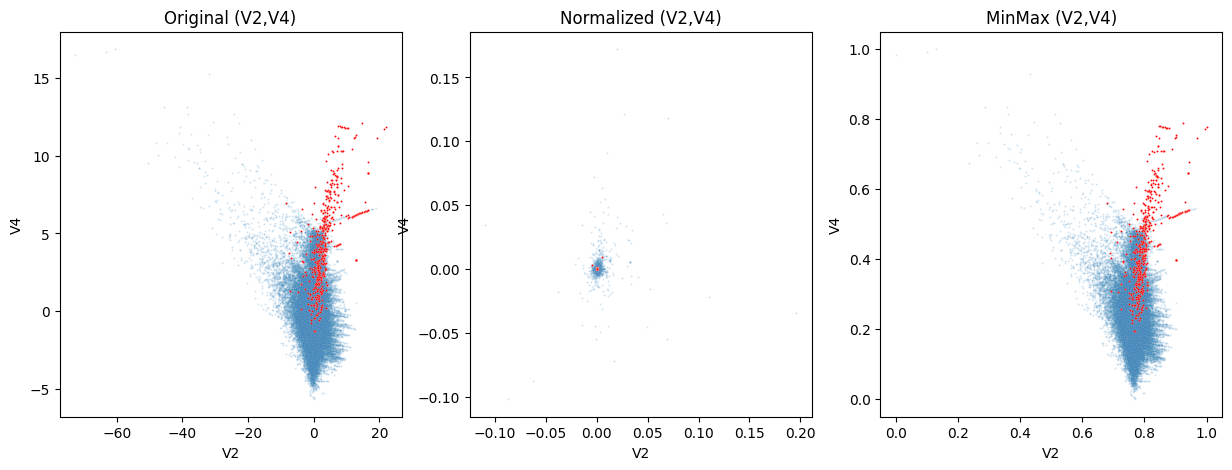

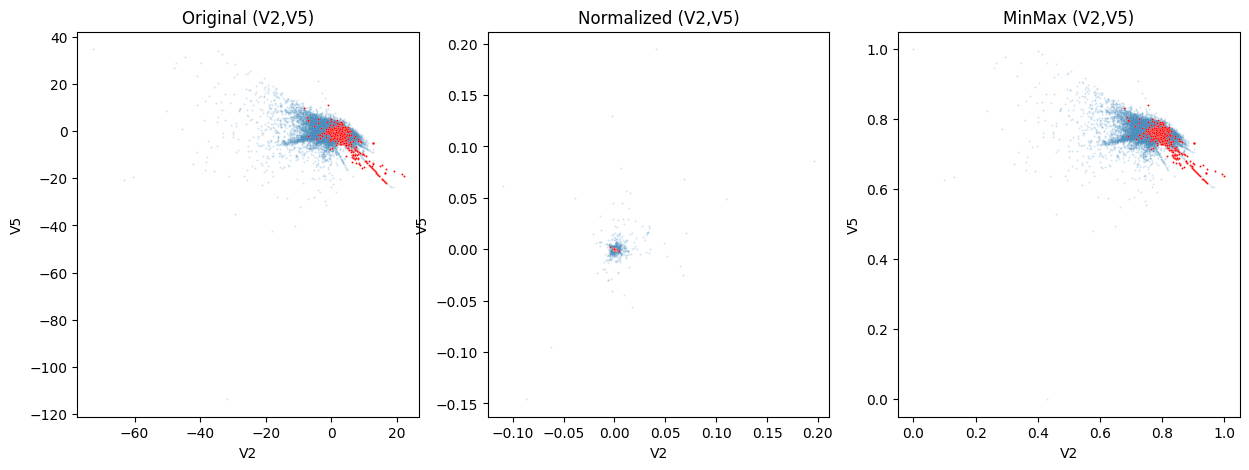

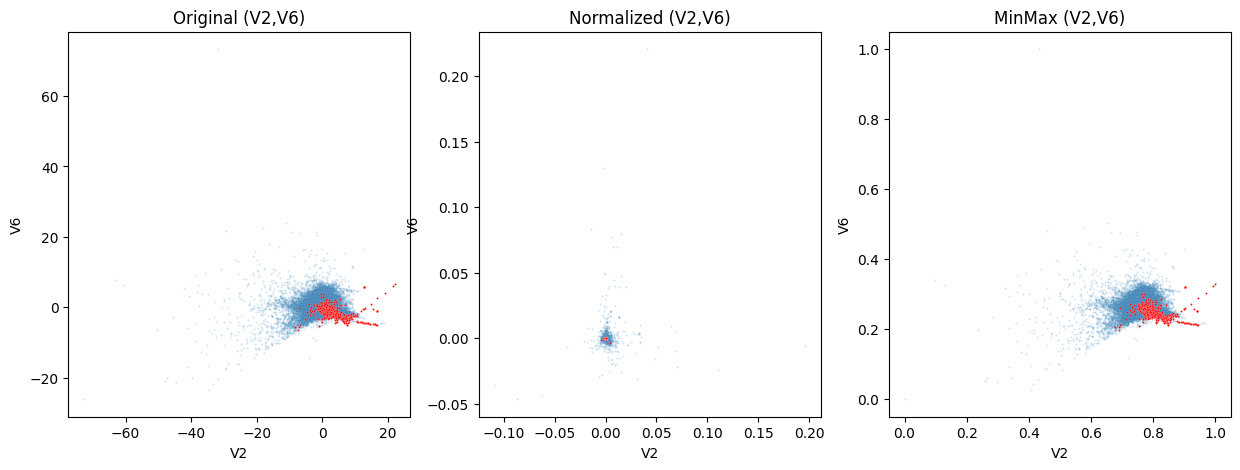

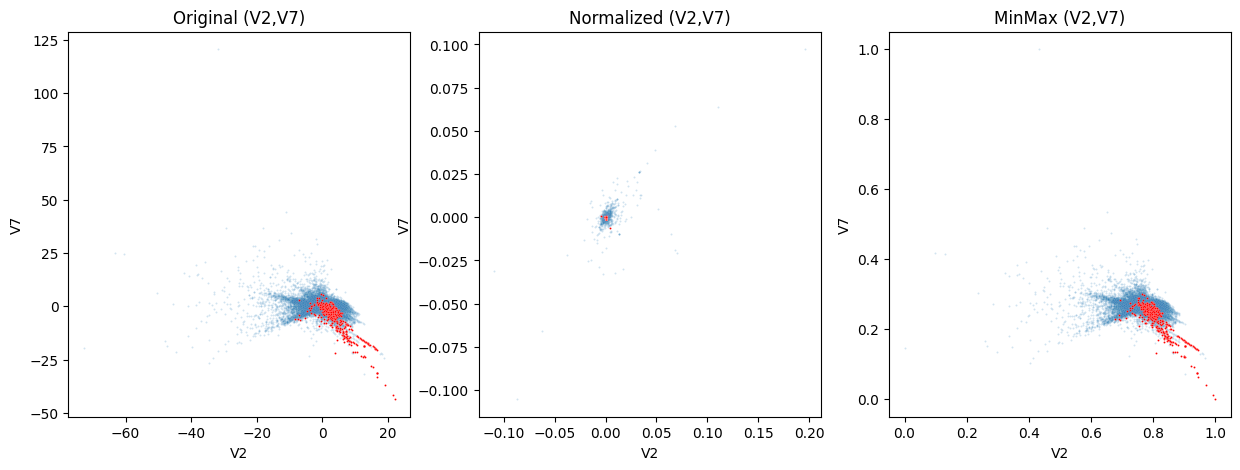

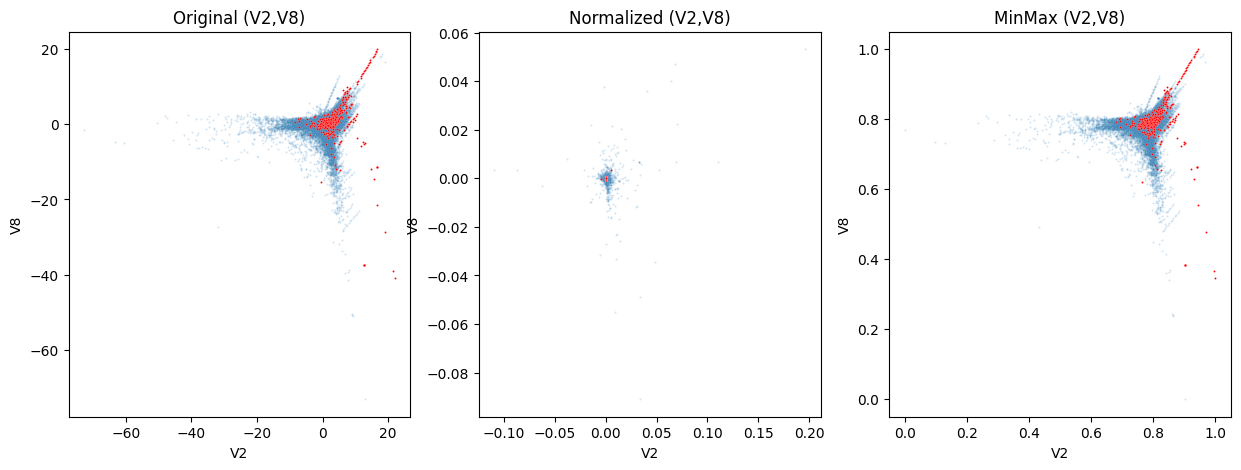

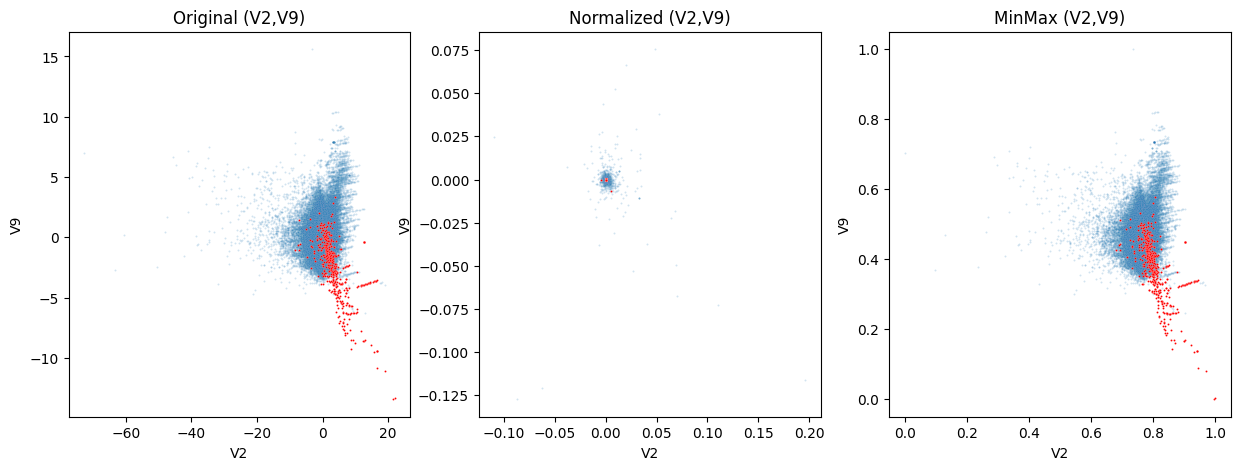

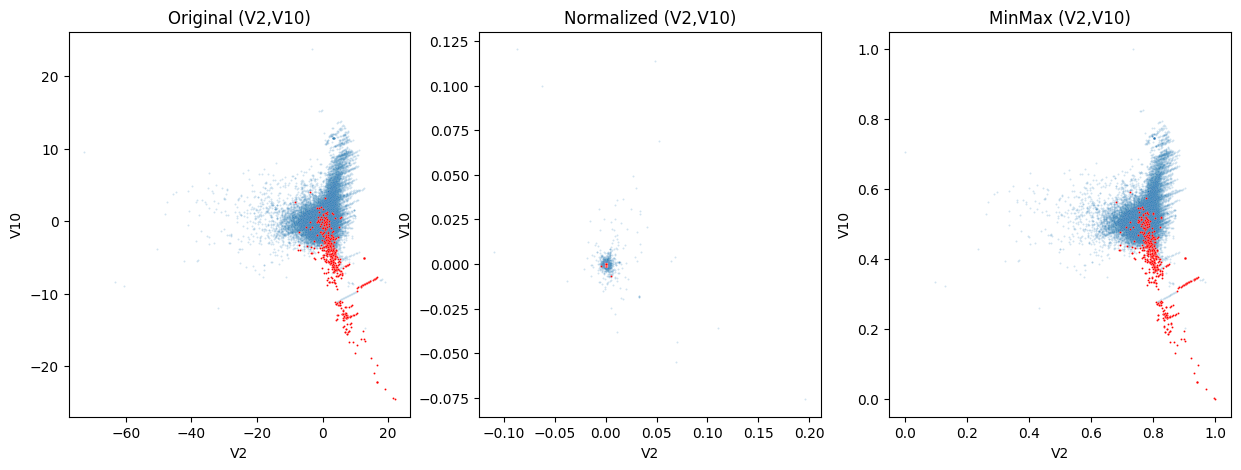

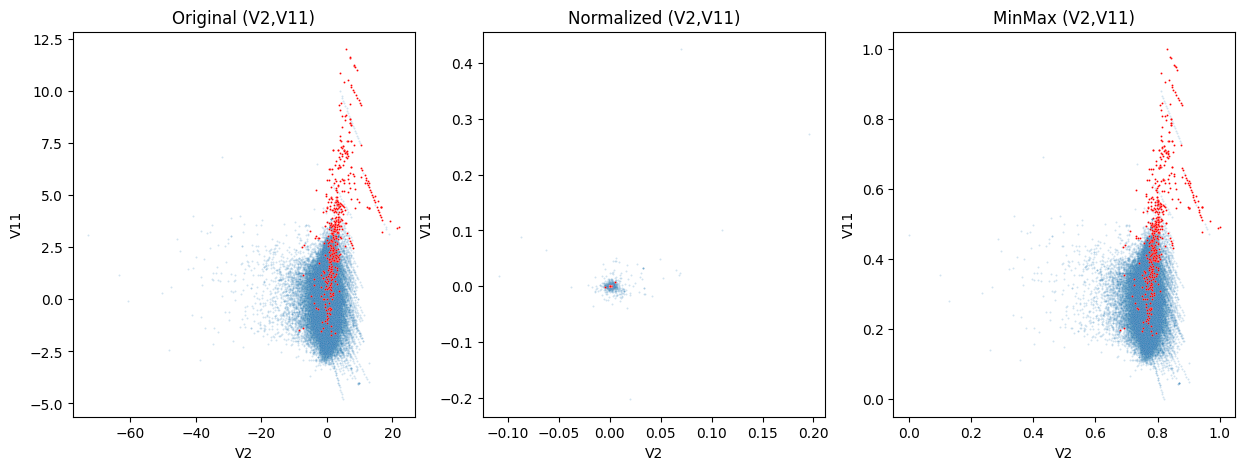

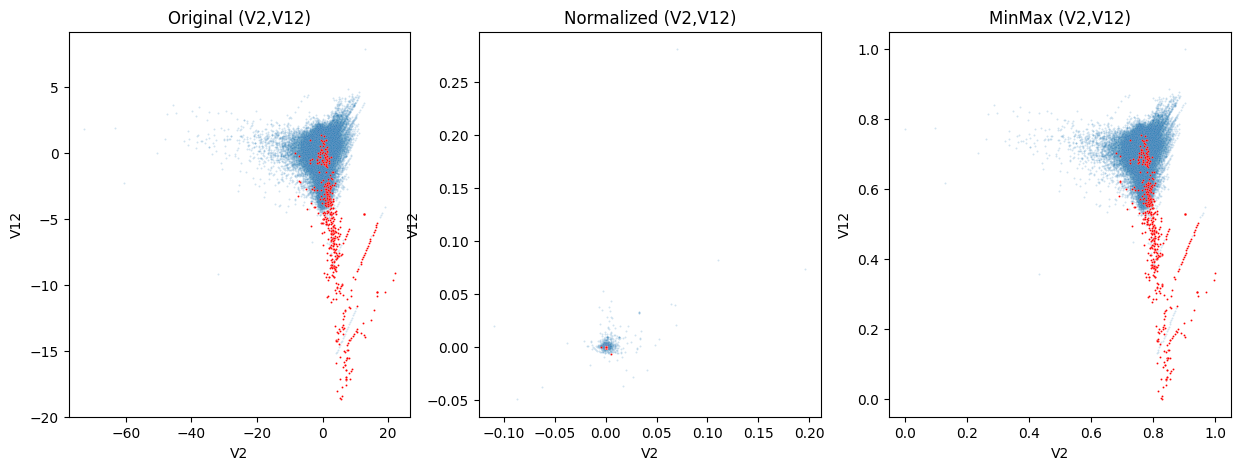

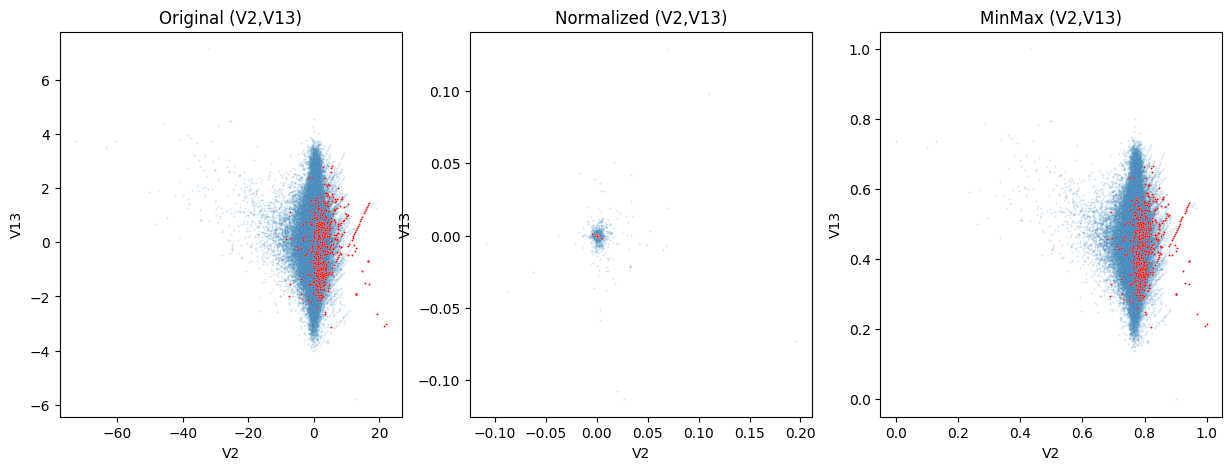

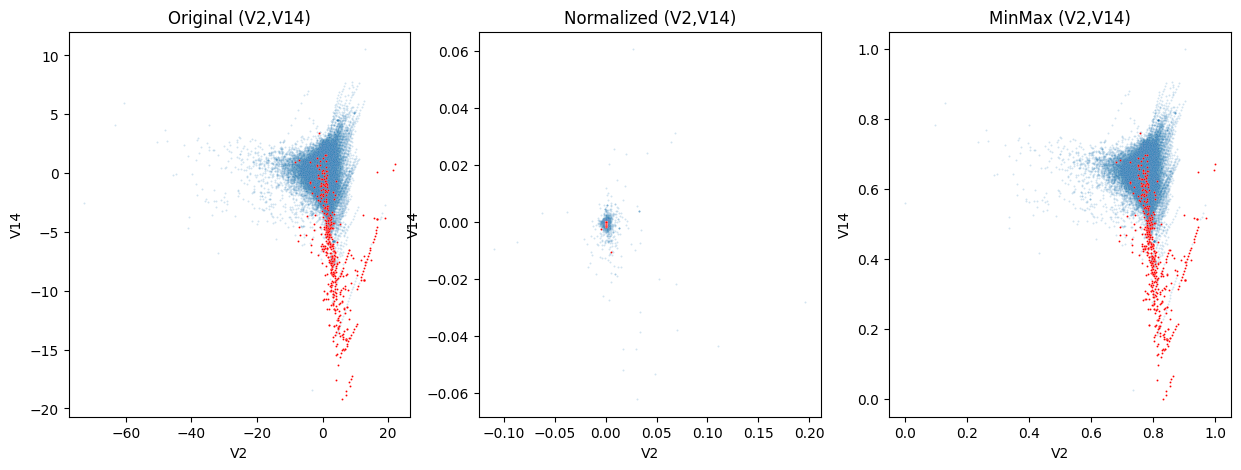

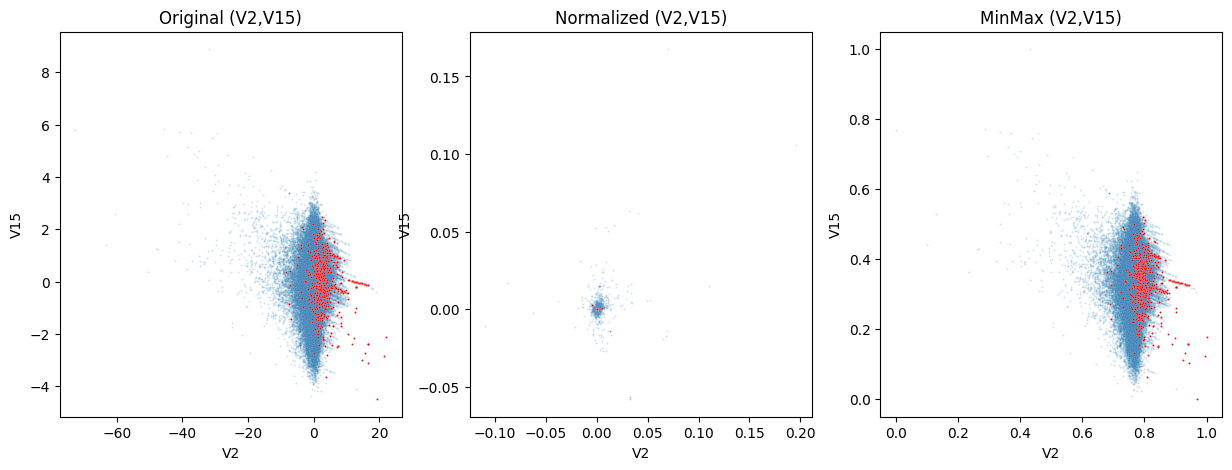

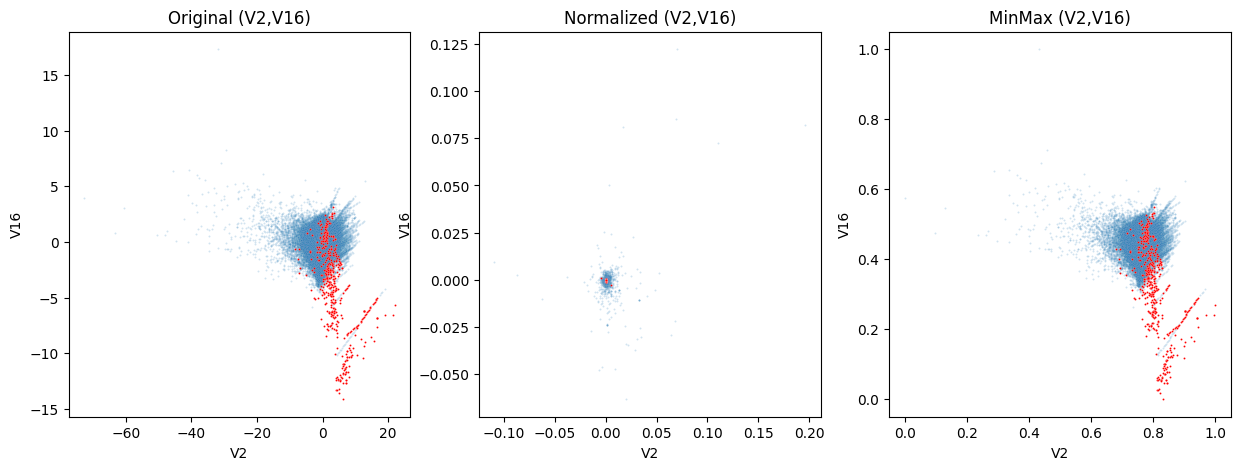

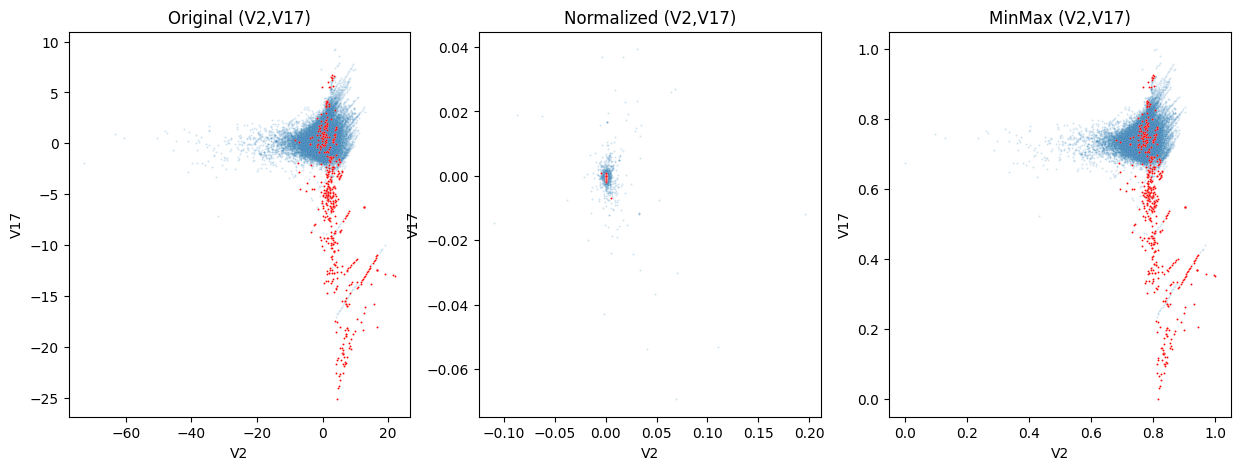

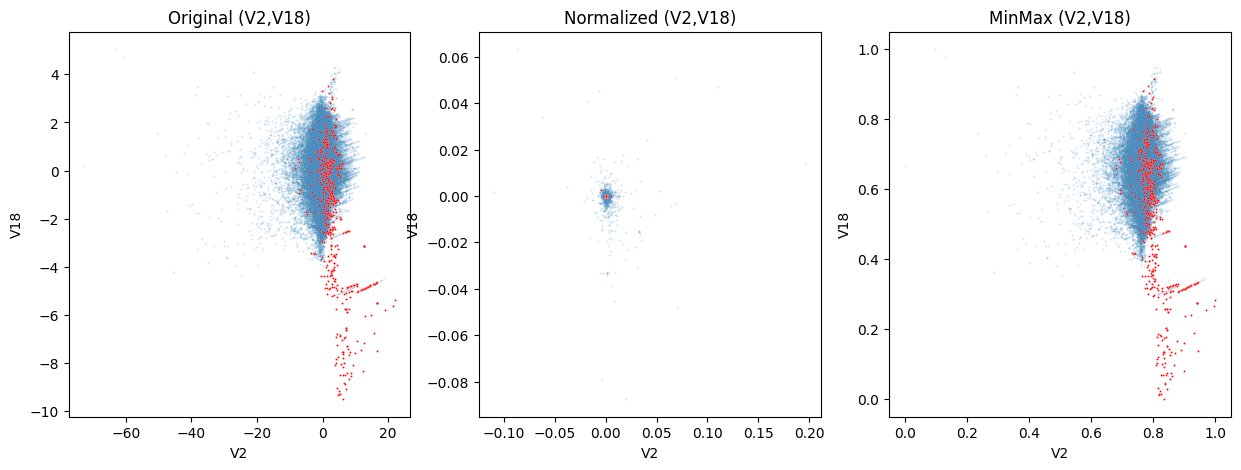

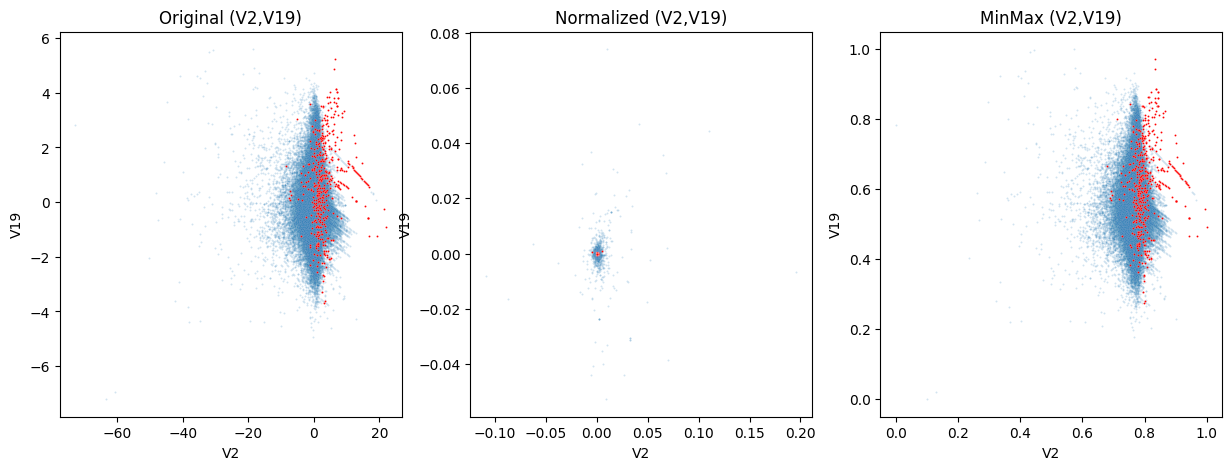

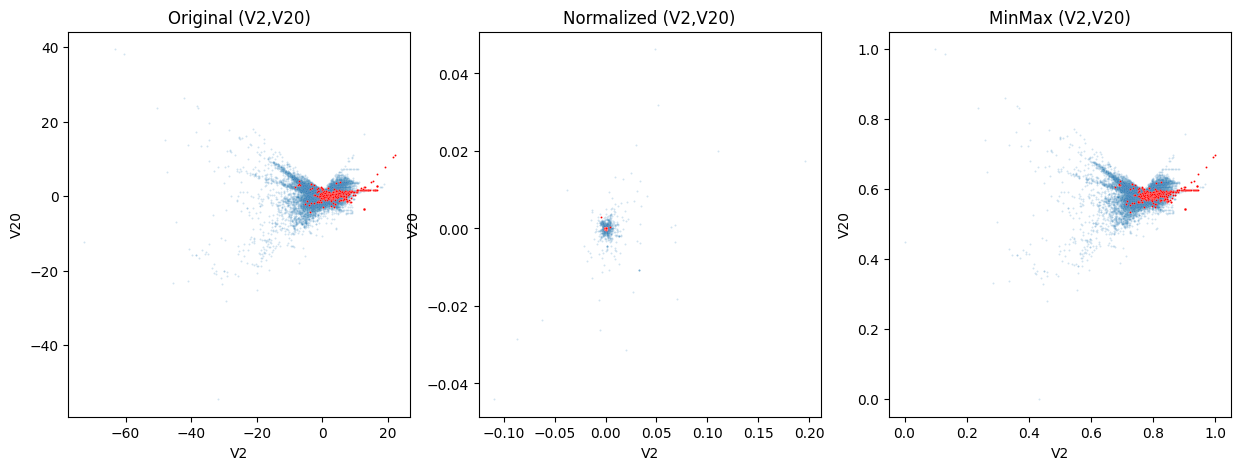

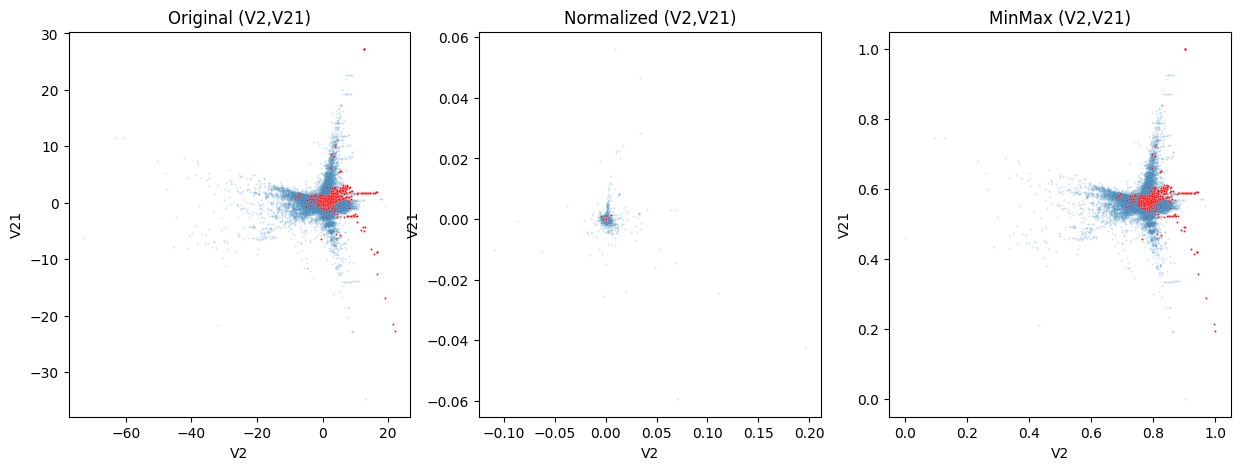

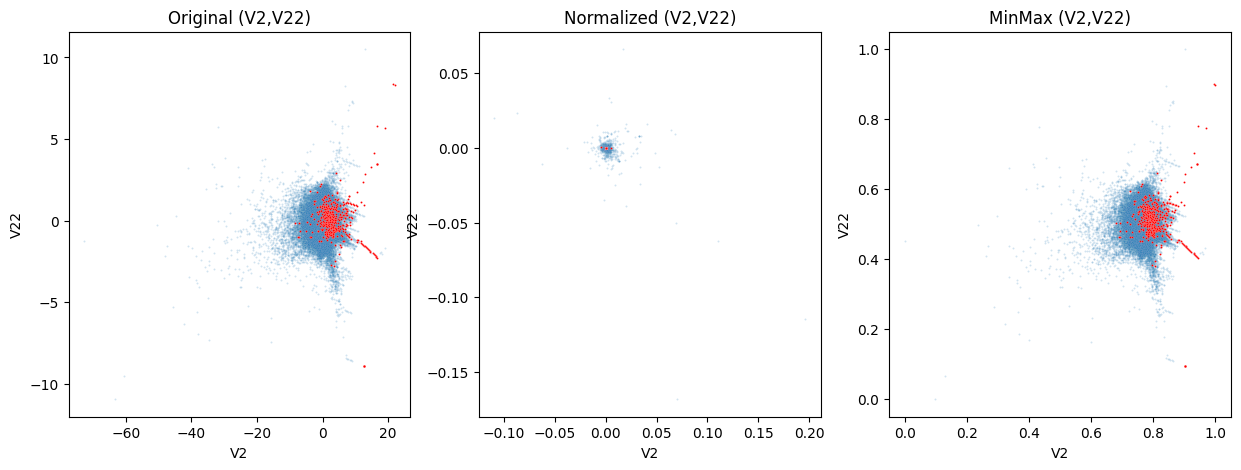

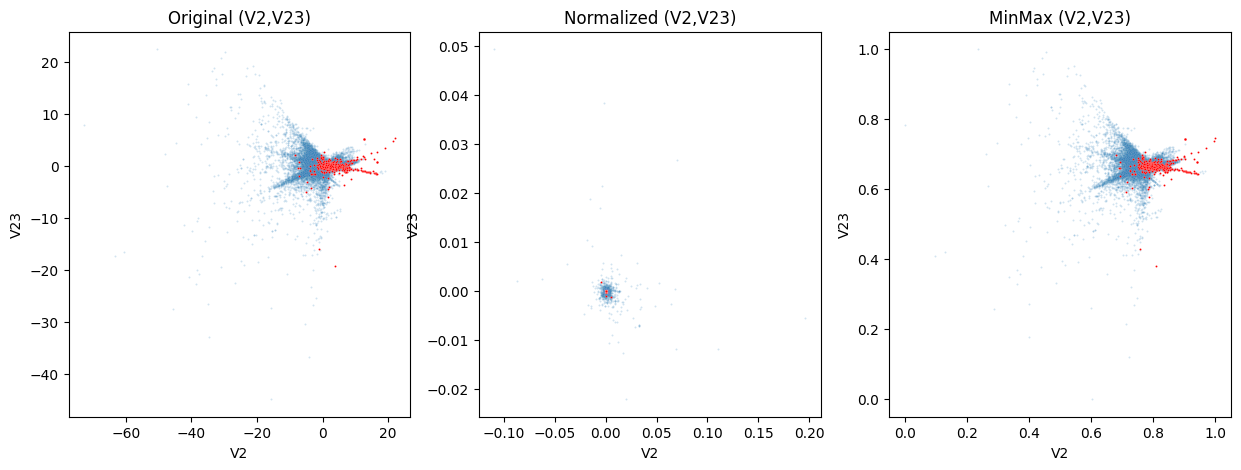

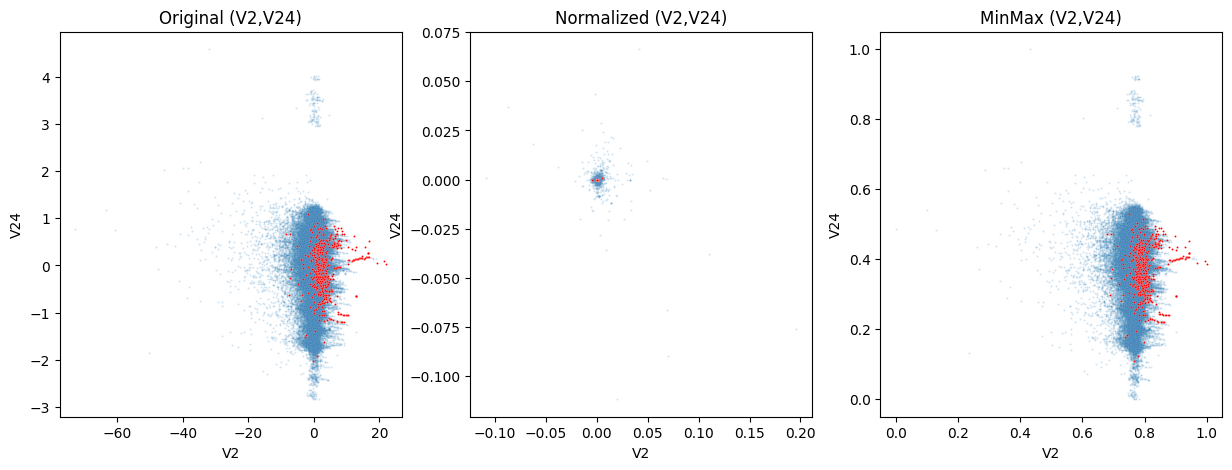

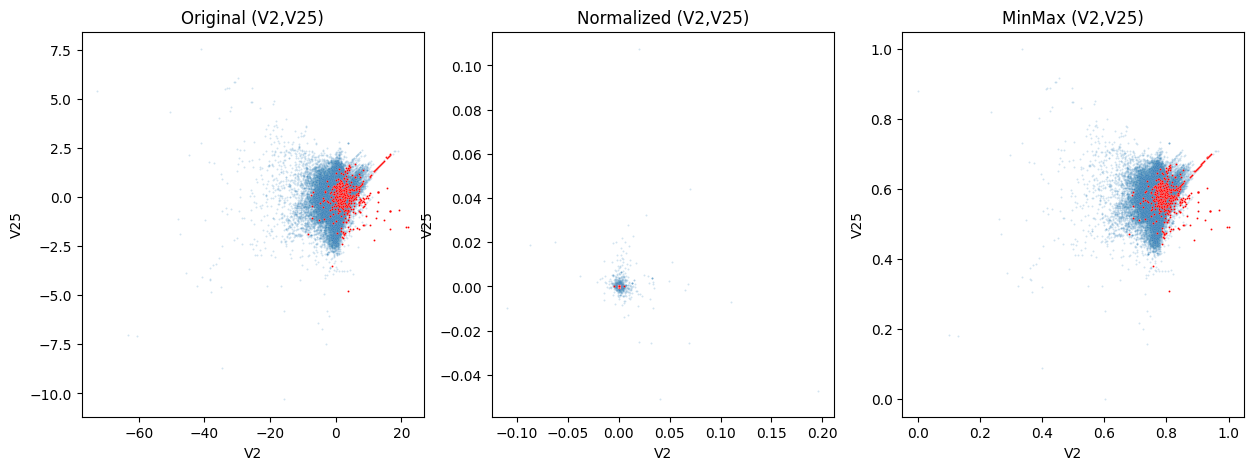

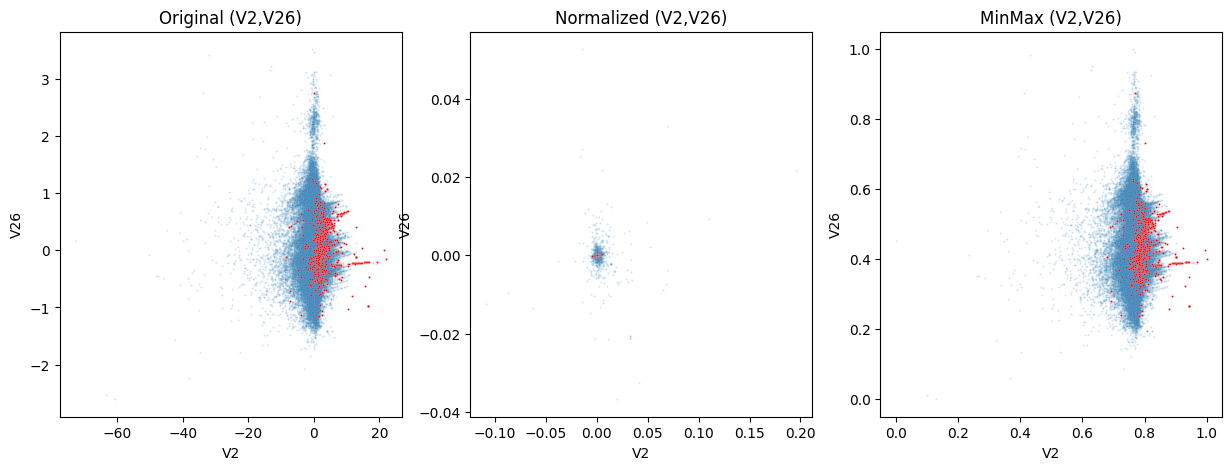

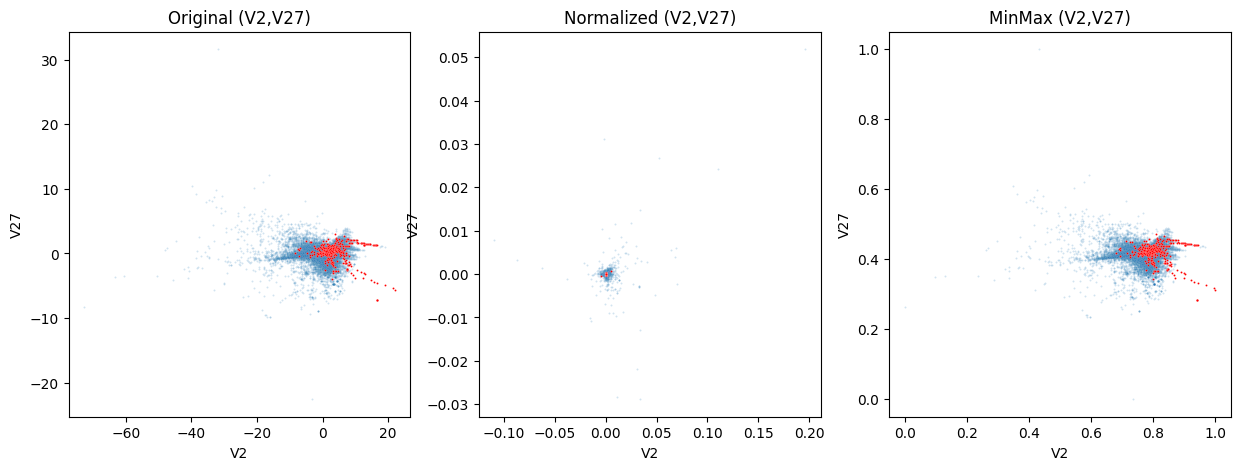

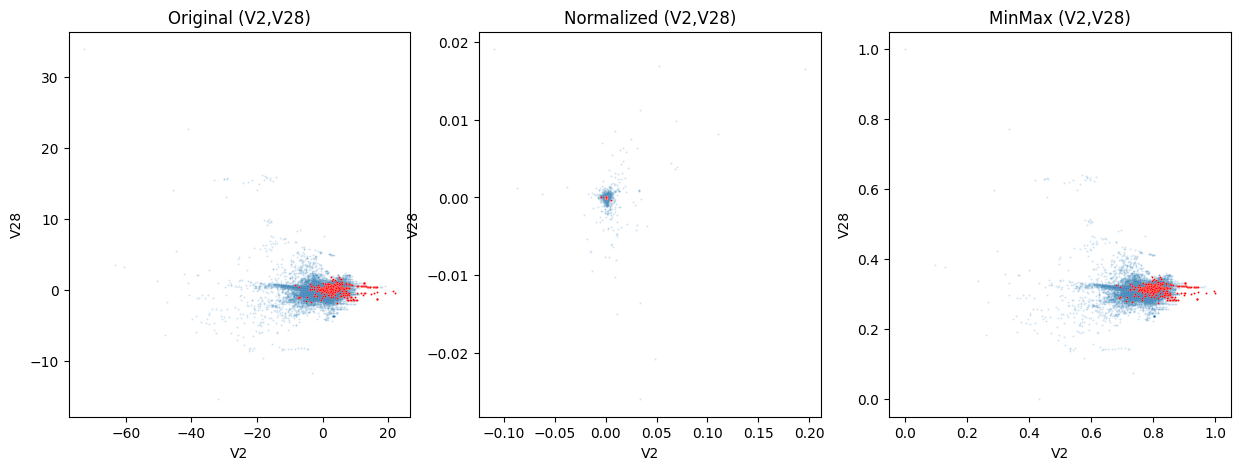

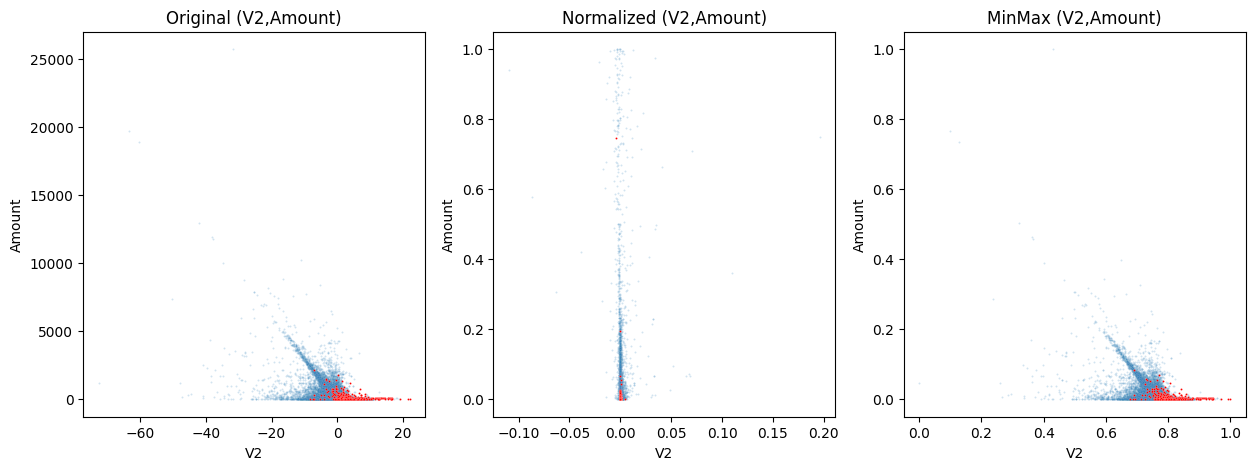

In [31]:
x_var = "V2"
for y_var in data.drop([target,x_var],axis=1).columns:
    plot_org_norm_minmax(x_var, y_var)